# COGS 108 - Final Project 

# Overview

As the pace of life continues to accelerate, more and more people are having different degrees of mental health problems. According to a recent survey, one in four people in the world will be affected by mental or neurological disorders at some point in their lives. If mental problems are not carefully taken care of, commiting suicide will become the most irreparable tragedy in the end. As a team, we want to investigate into different potential factors that may cause suicidal behavior. Specifically in our project, we focus on the relationship between suicide rate and gender, country, GDP and HDI(Human Development Index, a statistic composite index of life expectancy, education, and per capita income indicators). We hope to shed light on such serious mental issues and effectively intervene and prevent suicidal behaviors.

# Names

- Sainan Chen
- Liying Gui
- Yuechen Liu
- Kunal Parilekar
- Maryam Rahdaran
- Mingshuo Yu

# Group Members IDs

- A14483750
- A14428755
- A15682187
- A12747850
- A15714113
- A14754971

# Research Question

Based on the dataset, we want to know that is suicide rate growing every year (the trend of suicide rate), in general, which population is more likely to commit suicide? (country, age, gender), for each Top suicide rate country, analyse which age or gender are more likely to commit suicide, Is there any relationship between country wealth (GDP) and suiside rate? Is there any relationship between country HDI and suiside rate?Is there any difference between MEDC (developed countries) and LEDC(developing countries) about suicide rate across year levels? (HT) As a result, research for what affects suicide rate so we could use it to prevent people from commiting suicide.

## Background and Prior Work

Suicide has became one of the major causes of death in recent years. According to World Health Organization (WHO), there are 800,000 people commit suicide every year, which is twice the population for all UC campus, and it equals to one life lose every 40 seconds. The trend of increasing suicide rate can also be seen from previous researches. According to Bertolote and Fleischmann, global suicide rates per 100,000 population increased from 22 in 1950 to 32 in 1995, and finally expected to 37 in 2020. They also mentions that total estimate of suicide in 2020 would be 1.53 million. 

To effectively reduce the suicide rate, social behavior scientists and psychologists want to find out if suicide is related to physical conditions. Another two focus of Bertolote and Fleischmann’s paper is correlation of gender and age with suicide rate. Generally the male suicide rate is higher than female and the ratio is still growing every year (3.2:1 in 1950, 3.6:1 in 1995 and 3.9:1 in 2020). Furthermore, when the age increases, the suicide rate also increases (rate of 1.2 in age group 5-14, and 55.7 in age group over 75). Another factor influencing suicide rate that Antonio and Preti mentioned in their paper is climate and season. Elders’ suicide time distribution is more seasonally asymmetric, and people are more likely to commit suicide with violent methods during spring time than late autumns. In contrast, non-violent suicide has the opposite time distribution from violent suicide time distribution. More specifically, suicide rate is positively correlated to temperature and exposure to sun. 

In our project, besides looking at the suicide trend and checking the influence of gender and age on suicide rate using 30-year data, we want to further investigate if the country people live also affect suicide rate by looking at the country’s HDI and GDP. 

References (include links):
- 1)Bertolote, Manoel José and Fleischmann Alexandra Fleischmann. “A global perspective
in the epidemiology of suicide.” Suicidologi, 2002, årg. 7, nr. 2. https://www.iasp.info/pdf/papers/Bertolote.pdf.
- 2) Antonio Preti,􏰒, Paola Miotto, 1998. “Seasonality in suicides: the influence of suicide method, gender and age on suicide distribution in Italy.” Psychiatry Research, Volume 81, Issue 2, 16 November 1998, Pages 219-231. https://www.sciencedirect.com/science/article/pii/S0165178198000997.

# Hypothesis


We have 3 main Hypotheses:

1. There is a positive linear relationship between suicide rate and year. 
        -We believe that that as the pressures of the increasingly modern world increase, so will the suicide rate.
        
2. There is a relationship between gender and and suicide rate.
        -There have been studies done that show that men commit suicide at a higher rate than women, we believe this. 

3. There is a positive linear relationship between age and suicide rate.
        -We believe that as life goes on, one is probably exposed to more pressures, and thus is more likely to commit     suicide.
        
4. There is a linear relationship between GDP per Capita, and suicide rate. 
        -We aren't sure whether there will be a positive or negative relationship, because of both high and low gdp come   with their own set of struggles. We simply hypothesize that there will be a relationship.

5. There is a negative linear relationship between Human Development Index and suicide rate.

# Dataset(s)

Main data source: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016/

HDI data source:
http://hdr.undp.org/en/indicators/137506


The Kaggle dataset consists of information about suicide rates between 1985 to 2016 from 101 countries.  (Not all countries are represented due to unavailability of data from countries in Africa, Southeast Asia, and the Eastern Mediterranian. See Suicidologi 2002: 7(2), http://www.journals.uio.no/index.php/suicidologi/article/viewFile/2330/2193)

 Features in this dataset include:  

Country: a unique name for each country 
Year : include years from 1985 to 2016 
Sex: male/ female 
Age: age range of persons that commited suicide ( 5-14, 15-24, 25-34, 35-54, 55-74, and 75+ )
Suicide-no: the number of suicides per country, year, sex and age group 
Population: Population a country-year-sex-age level. 
suicides/100k pop:  the number of suicides per country, year, sex and age group/ 100k population by country-year-sex-age level. 
country-year: the year that suicides happened 
HDI for year:  Human Development Index 
gdp_for_year : Gross Domestic Product per year for a country 
gdp_per_capita : Gross Domestic Product (GDP) per capita (per person).
Generation: the generation of persons that committed suicide. Such as: Boomers, generation X, and etc.

HDI report dataset includes the HDI between 1990 to 2017 for each country. We used this data set to fill out missing HDI data in Kaggle dataset.


# Setup

In [1]:
#Import the libraries
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Set up the dataframe
main_df = pd.read_csv("master.csv")
#Set up the supplementary dataframe for HDI
supp_df = pd.read_csv("Human-development-index-HDI.csv", encoding='latin-1')

In [3]:
#Now combine the two databases
#Get the earliest year from the main database
min_year = main_df['year'].min()
print(min_year)
#This falls before the supp database so leave it for now
supp_df


1985


,Human development index (HDI),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,168,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.437,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498
1,68,Albania,0.645,0.626,0.610,0.613,0.619,0.632,0.641,0.641,...,0.724,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785
2,85,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.608,0.617,...,0.709,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.753,0.754
3,35,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.831,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858
4,147,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.502,0.522,0.520,0.535,0.543,0.554,0.564,0.572,0.577,0.581
5,70,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.777,0.770,0.766,0.762,0.765,0.768,0.770,0.775,0.778,0.780
6,47,Argentina,0.704,0.713,0.720,0.725,0.728,0.731,0.738,0.746,...,0.795,0.799,0.813,0.819,0.818,0.820,0.820,0.822,0.822,0.825
7,83,Armenia,0.631,0.628,0.580,0.588,0.599,0.605,0.612,0.623,...,0.727,0.724,0.728,0.731,0.737,0.742,0.745,0.748,0.749,0.755
8,3,Australia,0.866,0.867,0.868,0.872,0.875,0.883,0.886,0.889,...,0.920,0.921,0.923,0.925,0.929,0.931,0.933,0.936,0.938,0.939
9,20,Austria,0.795,0.800,0.805,0.807,0.813,0.817,0.820,0.824,...,0.884,0.886,0.895,0.897,0.899,0.897,0.901,0.903,0.906,0.908


In [4]:
supp_df['Country'] = supp_df['Country'].astype(str)
supp_df.dtypes

Human development index (HDI)      int64
Country                           object
1990                             float64
1991                             float64
1992                             float64
1993                             float64
1994                             float64
1995                             float64
1996                             float64
1997                             float64
1998                             float64
1999                             float64
2000                             float64
2001                             float64
2002                             float64
2003                             float64
2004                             float64
2005                             float64
2006                             float64
2007                             float64
2008                             float64
2009                             float64
2010                             float64
2011                             float64
2012            

In [5]:
main_df.rename(columns={' gdp_for_year ($) ':'gdp_for_year ($)'}, inplace=True)
main_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [6]:
#Set a comparator
comparator = np.float64(10)
#Now iterate through the main and find relevant values
for i, row in main_df.iterrows():
    #Only do this if there isn't already a value for HDI
    if(pd.isna(row['HDI for year'])):
        value = -1
        country = row['country']
        year = row['year']
        year = str(year)
        #Get the relevant row from the supp dataframe
        hdi_row = supp_df.loc[supp_df['Country'].str.contains(country)]
        #Check if the year is in the columns
        if(year in hdi_row.columns):
            #If so, get the value
            value = hdi_row[year]
        #If the value was found and it wasn't -1, and the series is not empty get the first value of the series
        if(type(value) != type(-1)):
            if(len(value) > 0):
                value = (value.values[0])
                if(pd.isna(value)):
                    value = -1
            else:
                value = -1
        main_df.loc[i, 'HDI for year'] = value

# Data Cleaning

Describe your data cleaning steps here.

In [7]:
#First get an understanding of what the data looks like
main_df.shape

(27820, 12)

In [8]:
checked_df = main_df.dropna()
checked_df.shape

(27820, 12)

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [9]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

1. Is suicide rate growing every year? 

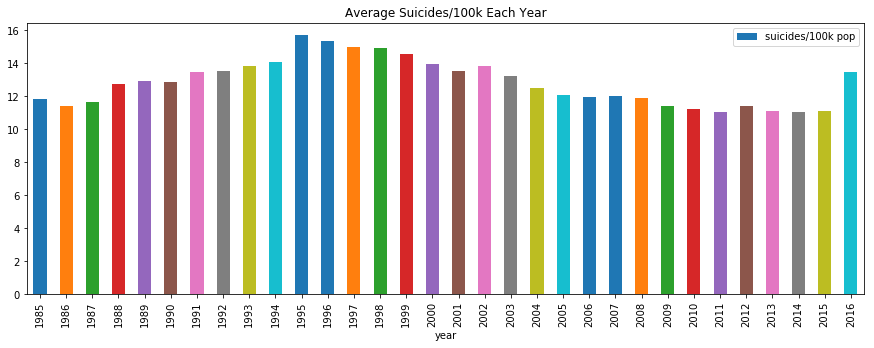

In [10]:
year_group = main_df.groupby('year').mean()
year_group.plot(y='suicides/100k pop',kind="bar", figsize=(15, 5), title="Average Suicides/100k Each Year")

As we can see in the graph, we cannot conclude that the suicide rate is growing each year. We can see from the graph that there is a peak in 1995 and 2016 but there is no clear clue to show that the suicide rate is either increasing or decreasing.

2. In general, which population is more likely to commit suicide? (country, age, gender) 

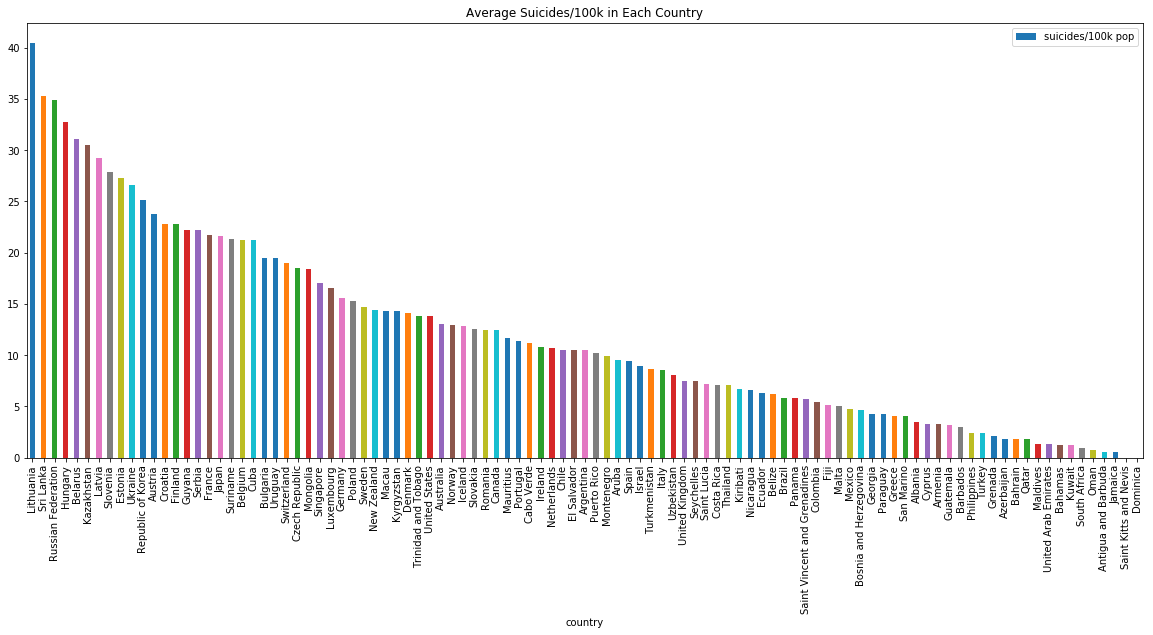

In [11]:
country_group = main_df.groupby('country').mean()
country_group = country_group.sort_values(by=['suicides/100k pop'], ascending=False)
country_group.plot(y='suicides/100k pop',kind="bar", figsize=(20, 8), title="Average Suicides/100k in Each Country")

In [12]:
country_group

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
country,,,,,,
Lithuania,2005.419847,107.019084,2.598672e+05,40.415573,0.794176,9280.549618
Sri Lanka,1997.545455,421.522727,1.382770e+06,35.295152,0.523091,904.272727
Russian Federation,2002.000000,3733.771605,1.139137e+07,34.892377,0.681074,6518.814815
Hungary,2003.419355,238.358065,8.020782e+05,32.761516,0.717284,9370.051613
Belarus,2001.095238,237.666667,7.832234e+05,31.075913,0.313952,3333.904762
Kazakhstan,2002.500000,325.467949,1.209980e+06,30.511282,0.657077,5329.115385
Latvia,2005.000000,50.674603,1.779867e+05,29.259325,0.773381,8961.095238
Slovenia,2005.000000,42.123016,1.597961e+05,27.827857,0.849143,18642.238095
Estonia,2005.000000,27.912698,1.075032e+05,27.276905,0.811048,11376.095238


Above table is countries that are sorted in the order of suicide rate. 
As we can see the countries listed in the top have higher suicide rate.

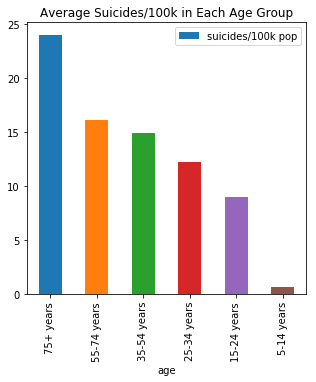

In [13]:
age_group = main_df.groupby('age').mean()
age_group = age_group.sort_values(by=['suicides/100k pop'], ascending=False)
age_group.plot(y='suicides/100k pop',kind="bar", figsize=(5, 5), title="Average Suicides/100k in Each Age Group")

As we can see in the graph above, age group of 75+ has the highest suicide rate and age group of 5-14 has the lowest suicide rate.

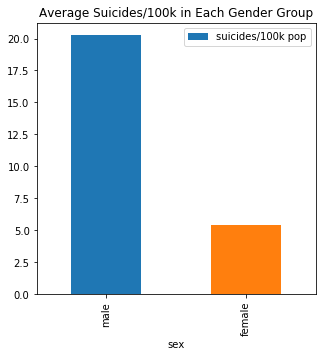

In [14]:
gender_group = main_df.groupby('sex').mean()
gender_group = gender_group.sort_values(by=['suicides/100k pop'], ascending=False)
gender_group.plot(y='suicides/100k pop',kind="bar", figsize=(5, 5), title="Average Suicides/100k in Each Gender Group")

As we can see in the graph above, males' suicide rate is significantly higher than females'.

3.   For each Top suicide rate country, analyse which age or gender are more likely to commit suicide？


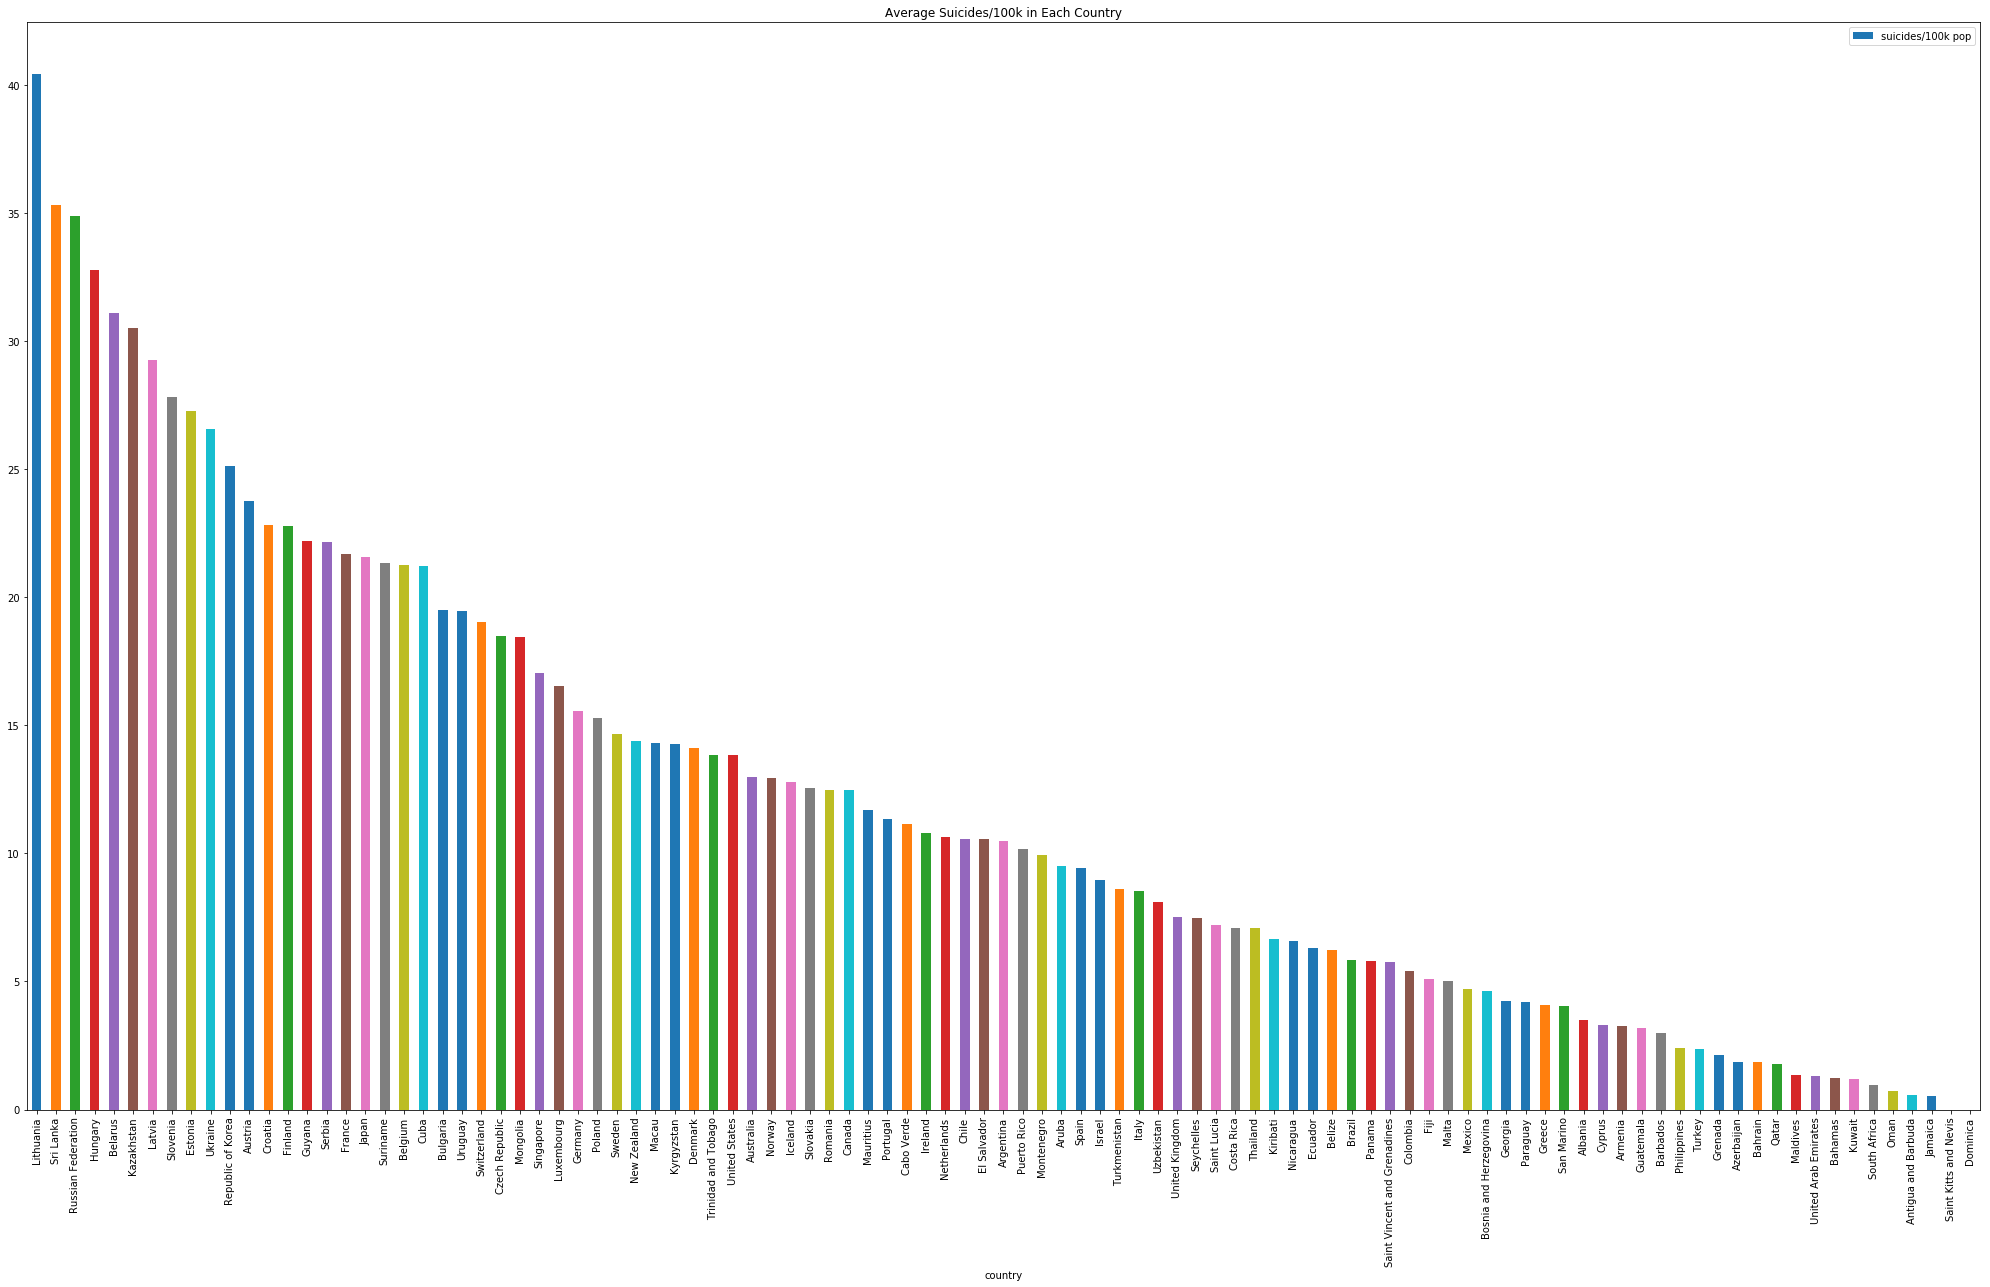

In [15]:
country_list = main_df.groupby('country', as_index=False).sum()
country_list = country_group.sort_values(by=['suicides/100k pop'], ascending=False)
country_list.plot(y='suicides/100k pop',kind="bar", figsize=(35, 20), title="Average Suicides/100k in Each Country")

In [16]:
top_country = country_list[0:3]

In [17]:
top_country

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
country,,,,,,
Lithuania,2005.419847,107.019084,2.598672e+05,40.415573,0.794176,9280.549618
Sri Lanka,1997.545455,421.522727,1.382770e+06,35.295152,0.523091,904.272727
Russian Federation,2002.000000,3733.771605,1.139137e+07,34.892377,0.681074,6518.814815


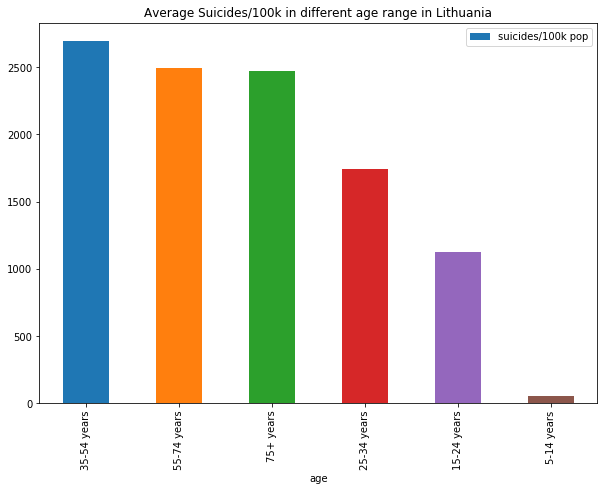

In [18]:
lithuania = main_df[main_df['country']=='Lithuania']
litAge = lithuania.groupby('age').sum()
litAge = litAge.sort_values(by=['suicides/100k pop'], ascending=False)
litAge.plot(y='suicides/100k pop',kind="bar", figsize=(10, 7), title="Average Suicides/100k in different age range in Lithuania")

As a result, people between 35-54 years old has the highest population to commit suicide, followed by 55-74 and 75+ ages old people.

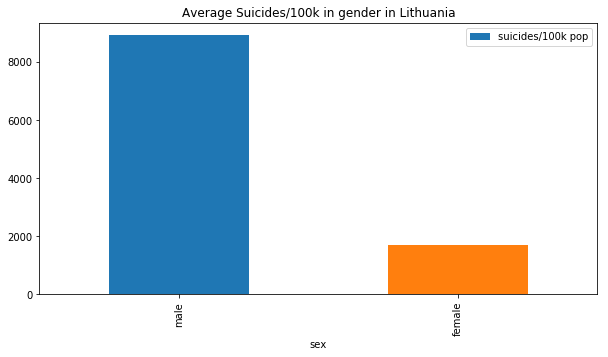

In [19]:
litGender = lithuania.groupby('sex').sum()
litGender = litGender.sort_values(by=['suicides/100k pop'], ascending=False)
litGender.plot(y='suicides/100k pop',kind="bar", figsize=(10, 5), title="Average Suicides/100k in gender in Lithuania")

As shown above, most people who commit suicide in Lithuania are male.

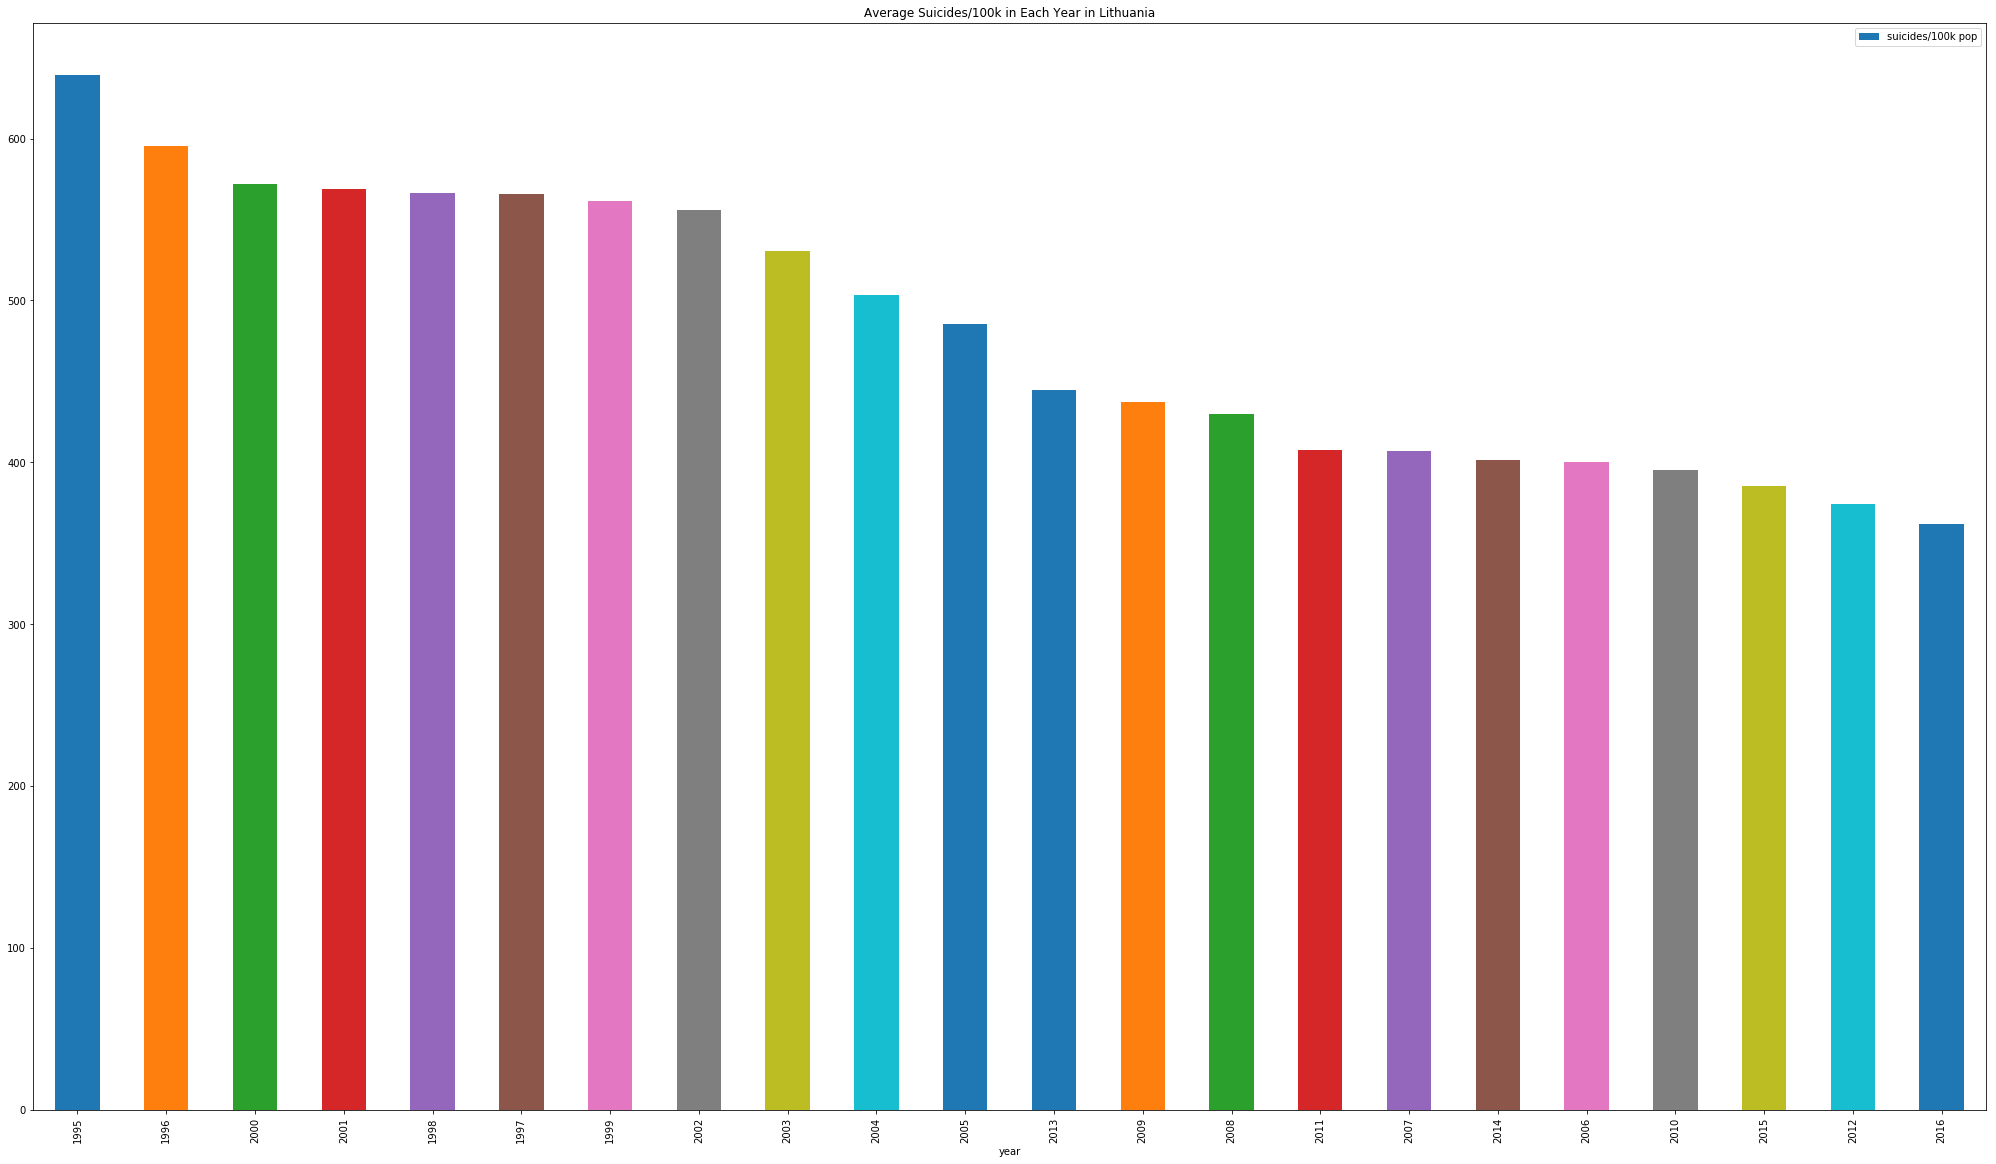

In [20]:
litYear = lithuania.groupby('year').sum()
litYear = litYear.sort_values(by=['suicides/100k pop'], ascending=False)
litYear.plot(y='suicides/100k pop',kind="bar", figsize=(35, 20), title="Average Suicides/100k in Each Year in Lithuania")

As the graph shows, the average suicide rate is decreasing significantly as year increases. In another word, less people commit suicide nowadays.

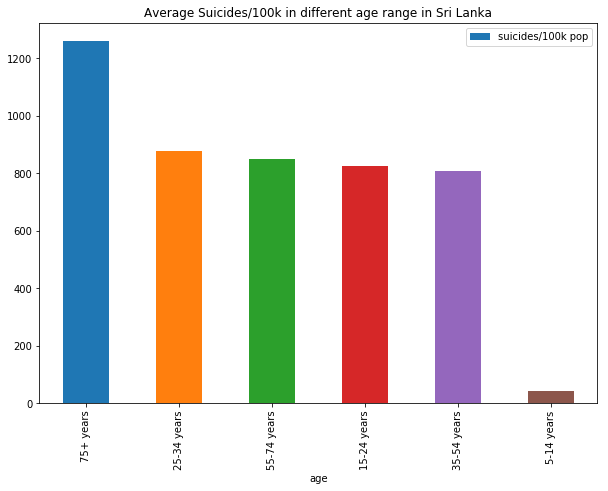

In [21]:
sri = main_df[main_df['country']=='Sri Lanka']
sriAge = sri.groupby('age').sum()
sriAge = sriAge.sort_values(by=['suicides/100k pop'], ascending=False)
sriAge.plot(y='suicides/100k pop',kind="bar", figsize=(10, 7), title="Average Suicides/100k in different age range in Sri Lanka")

As graph shown above, the number of older people between over 75 years old who commit suicide is signigiantly larger than other ages, so more attention to older people would be necessary in order to control the suicide rate in the future for Sri Lanka.

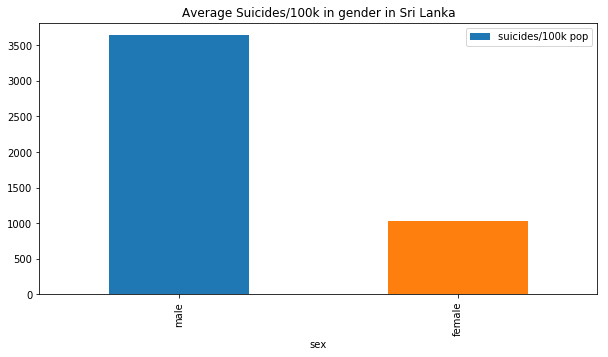

In [22]:
sriGender = sri.groupby('sex').sum()
sriGender = sriGender.sort_values(by=['suicides/100k pop'], ascending=False)
sriGender.plot(y='suicides/100k pop',kind="bar", figsize=(10, 5), title="Average Suicides/100k in gender in Sri Lanka")

Similarly, in Sri Lanka, male also takes a majority of the suicide population.

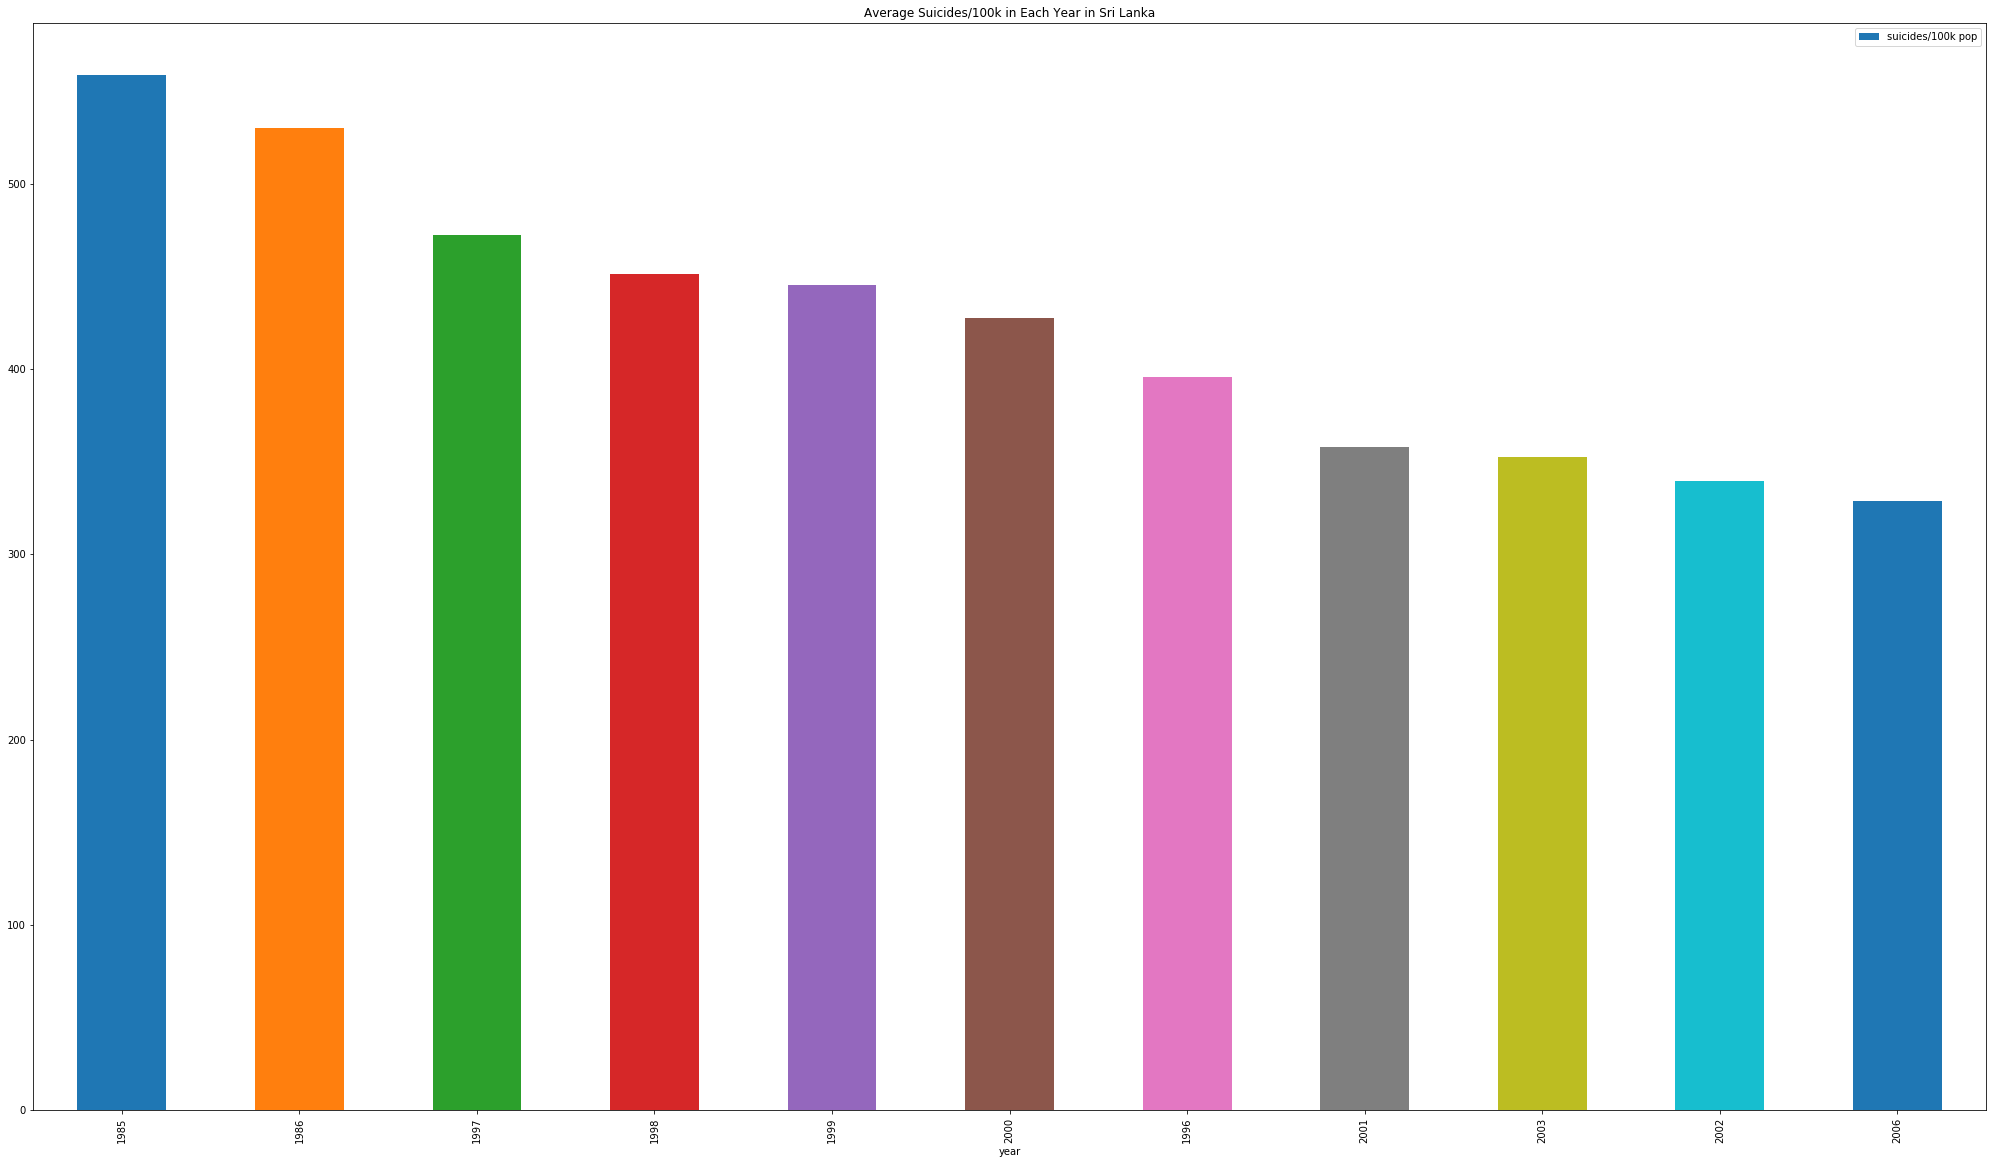

In [23]:
sriYear = sri.groupby('year').sum()
sriYear = sriYear.sort_values(by=['suicides/100k pop'], ascending=False)
sriYear.plot(y='suicides/100k pop',kind="bar", figsize=(35, 20), title="Average Suicides/100k in Each Year in Sri Lanka")

Russ's suicide population is also decreasing, but the decreasing rate is smaller recent several years.

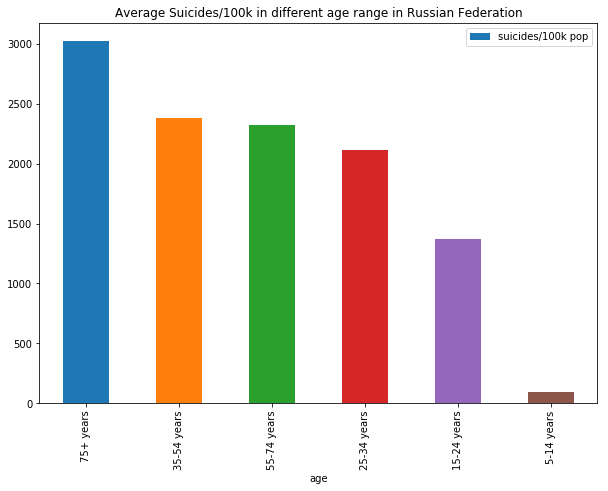

In [24]:
russ = main_df[main_df['country']=='Russian Federation']
russAge = russ.groupby('age').sum()
russAge = russAge.sort_values(by=['suicides/100k pop'], ascending=False)
russAge.plot(y='suicides/100k pop',kind="bar", figsize=(10, 7), title="Average Suicides/100k in different age range in Russian Federation")

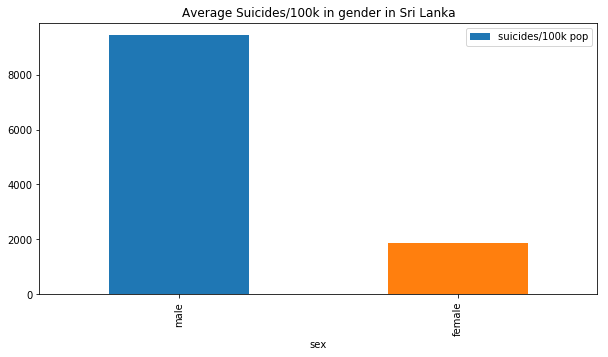

In [25]:
russGender = russ.groupby('sex').sum()
russGender = russGender.sort_values(by=['suicides/100k pop'], ascending=False)
russGender.plot(y='suicides/100k pop',kind="bar", figsize=(10, 5), title="Average Suicides/100k in gender in Sri Lanka")

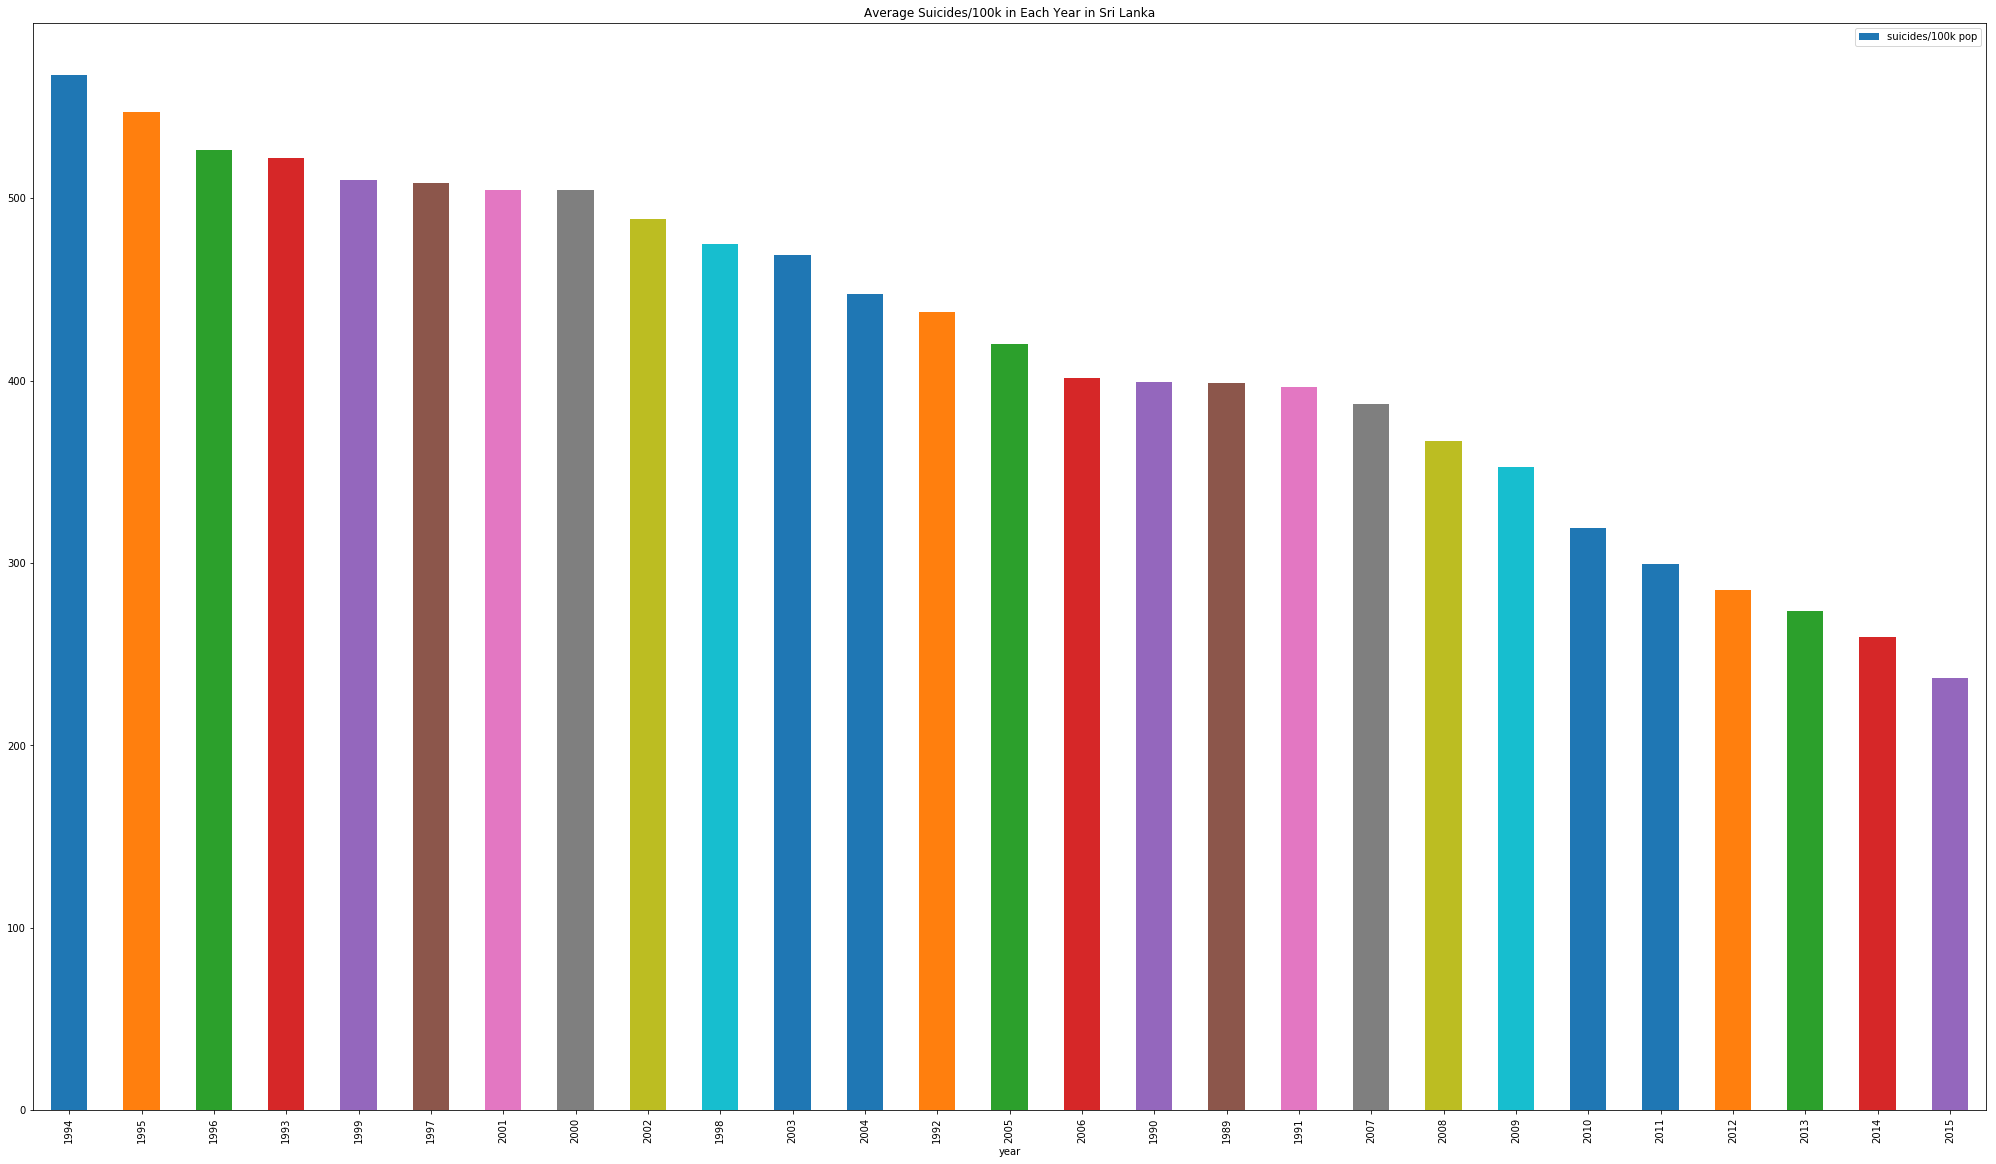

In [26]:
russYear = russ.groupby('year').sum()
russYear = russYear.sort_values(by=['suicides/100k pop'], ascending=False)
russYear.plot(y='suicides/100k pop',kind="bar", figsize=(35, 20), title="Average Suicides/100k in Each Year in Sri Lanka")

It could clearly show that the suicide population has decreased 

Overall, after comparing graphs from different countries with different variable (year, sex, age). We believe that thought their suicide population are all decreasing, the Russian Federation has the most significant decrease. And for all three countries, male takes the majority of the suicide population. 

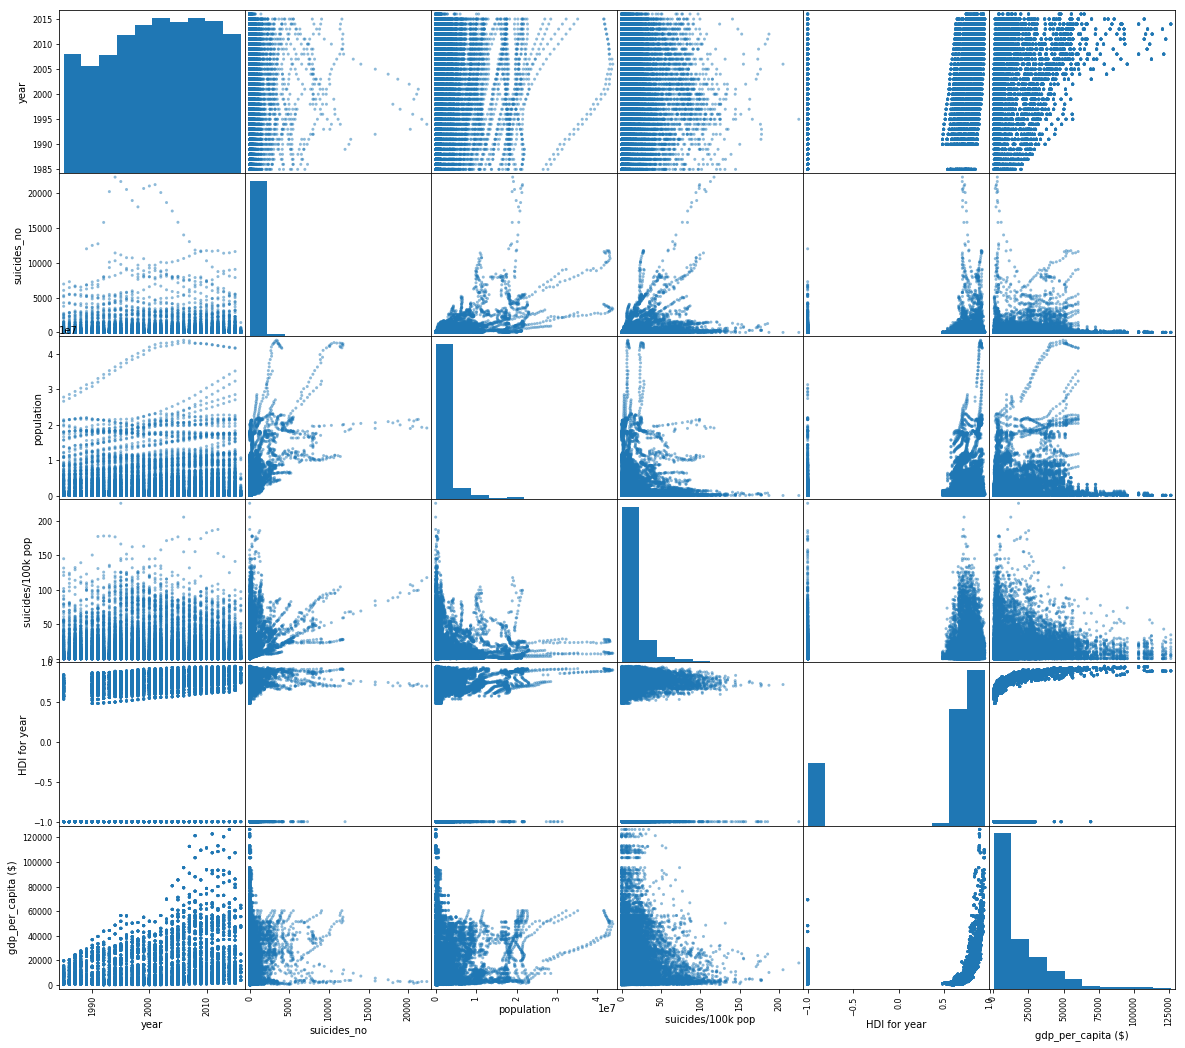

In [27]:
from pandas.plotting import scatter_matrix
fig=scatter_matrix(main_df,figsize=(20,18))


In [28]:
corrs=main_df.corr()
corrs

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.484373,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.050772,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.086671,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.034119,0.001785
HDI for year,0.484373,0.050772,0.086671,0.034119,1.000000,0.278616
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.278616,1.000000


## GDP per capita and suicide rate

In [29]:
# combine suicide number of diffent gender and age in same country and same year
aggregation_functions = {'country-year': 'first','country': 'first','year': 'first', 'suicides/100k pop': 'sum', 'gdp_per_capita ($)': 'first'}
df_new = main_df.groupby(main_df['country-year']).aggregate(aggregation_functions).reindex(columns=main_df.columns)
df_new.drop(['sex', 'age', 'suicides_no','population','HDI for year','gdp_for_year ($)','generation'], inplace=True, axis=1)

### Scatter plot

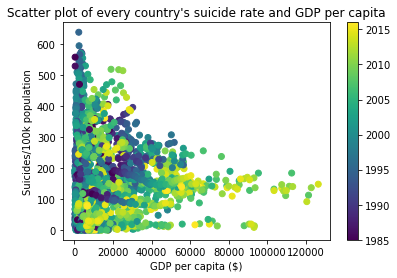

In [30]:
# scatter plot to see suicide rate and GDP per capita for countries in different year
plt.scatter(df_new['gdp_per_capita ($)'],df_new['suicides/100k pop'],c=df_new['year'])
plt.title("Scatter plot of every country's suicide rate and GDP per capita")
plt.xlabel("GDP per capita ($)")
plt.ylabel("Suicides/100k population")
plt.colorbar()
plt.show()

On the scatter plot, we can see in general, the GDP per capita for countries gradually increase from 1985 to 2015, and the suicide rate is a little bit dropping from 1985 to 2015. Although higher the GDP per capita, the upper boundary for suicide rate drops, we still can't see clearly how suicide rate distributes for countries with same GDP per capita. 

To further investigate, we specifically look into data in 2015 and 1985.

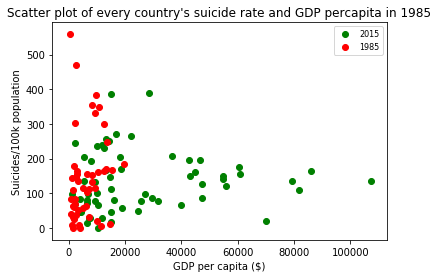

In [31]:
# scatter plot to see suicide rate and GDP per capita for different countries in year 1985
year_2015 = plt.scatter(df_new[df_new['year']==2015]['gdp_per_capita ($)'],df_new[df_new['year']==2015]['suicides/100k pop'], color='g')
year_1985 = plt.scatter(df_new[df_new['year']==1985]['gdp_per_capita ($)'],df_new[df_new['year']==1985]['suicides/100k pop'], color='r')
plt.title("Scatter plot of every country's suicide rate and GDP percapita in 1985")
plt.xlabel("GDP per capita ($)")
plt.ylabel("Suicides/100k population")
plt.legend((year_2015, year_1985),('2015', '1985'),scatterpoints=1,loc='upper right',fontsize=8)
plt.show()

From the scatter plot, we can clearly see that in general the GDP per capita is higher in 2015 than 1985. However, although the hightes suicide rate in one country drops in 2015, it's unclear how the suicide rate distribution in 2015 differs from the suicide rate distribution ino 1985. During both of the years, we can see as GDP per capita increase, there are less countries with extremely low suicide rate as well as countries with extremely high suicide rate. 

We want to run a linear regression model to check the linear relationship between GDP per capita and suicide rate in both years.

### Linear Regression Model

The simple linear regression model takes following form: 

y = a+bx

where in this case:
y is the suicide rate per 100k population 
x is the GDP per capita in dollar
a is the y-incercept 
b is the gradient, which means the increase the suicide rate per unit increase on GDP per capita.

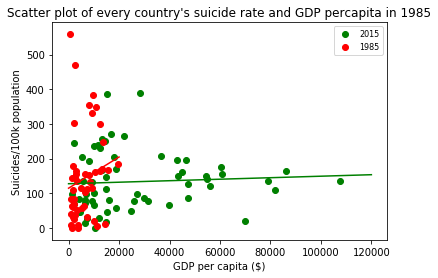

In [32]:
# best fit line in linear regression model
a1, b1 = np.polyfit(df_new[df_new['year']==2015]['gdp_per_capita ($)'], df_new[df_new['year']==2015]['suicides/100k pop'], 1)
gdp_2015 = np.arange(0,120000)
pred_suicide_rate_2015 = a1*gdp_2015 + b1

a2, b2 = np.polyfit(df_new[df_new['year']==1985]['gdp_per_capita ($)'], df_new[df_new['year']==1985]['suicides/100k pop'], 1)
gdp_1985 = np.arange(0,20000)
pred_suicide_rate_1985 = a2*gdp_1985 + b2

year_2015 = plt.scatter(df_new[df_new['year']==2015]['gdp_per_capita ($)'],df_new[df_new['year']==2015]['suicides/100k pop'], color='g')
year_1985 = plt.scatter(df_new[df_new['year']==1985]['gdp_per_capita ($)'],df_new[df_new['year']==1985]['suicides/100k pop'], color='r')
plt.plot(gdp_2015, pred_suicide_rate_2015, '-r',color = 'g')
plt.plot(gdp_1985, pred_suicide_rate_1985, '-r',color = 'r')
plt.title("Scatter plot of every country's suicide rate and GDP percapita in 1985")
plt.xlabel("GDP per capita ($)")
plt.ylabel("Suicides/100k population")
plt.legend((year_2015, year_1985),('2015', '1985'),scatterpoints=1,loc='upper right',fontsize=8)
plt.show()

According to the linear regression line, in both years, the suicide rate is in positive relation with GDP per capita. Higher the GDP per capita of the country, more likely the country has a higher suicide rate. By looking at the gradients of the regression lines, we conjecture in 1985 the GDP per capita has larger influence on suicide rate compared to 2015.

Then we want to check how reliable our linear regression model is.

In [33]:
df_new.rename(columns={'gdp_per_capita ($)':'gdp_per_capita'}, inplace=True)
df_new.rename(columns={'suicides/100k pop':'suicides'}, inplace=True)

df_new_2015 = df_new[df_new['year']==2015]
correlation_2015 = np.corrcoef(df_new_2015['gdp_per_capita'],df_new_2015['suicides'])

df_new_1985 = df_new[df_new['year']==1985]
correlation_1985 = np.corrcoef(df_new_1985['gdp_per_capita'],df_new_1985['suicides'])


The correlation of suicide rate and GDP per capita in 2015 is 0.061, which means the data conform little to the linear model. The correlation of suicide rate and GDP per capita in 1985 is 0.168, which means the data conform slightly more to the linear model than data in 2015.

To run the hypothesis test with significance level 0.05, we have following hypotheses:

Null hypothesis: There is no linear relationship between suicide rate and GDP per capita. (b=0)

Alternative hypothesis: There is a linear relationship between suicide rate and GDP per capita. (b not equal to 0)

### Hypothesis test for Linear Regression Model for 2015

In [34]:
#find p-value for linear regression in 2015 
outcome_1, predictors_1 = patsy.dmatrices('suicides ~ gdp_per_capita', df_new_2015)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:               suicides   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.2274
Date:                Sat, 01 Jun 2019   Prob (F-statistic):              0.635
Time:                        14:58:19   Log-Likelihood:                -363.13
No. Observations:                  62   AIC:                             730.3
Df Residuals:                      60   BIC:                             734.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        127.4415     16.173      7.

In [35]:
# alternative way to find P-value
lm1 = smf.ols(formula='suicides ~ gdp_per_capita', data=df_new_2015).fit()
lm1.pvalues

Intercept         7.856747e-11
gdp_per_capita    6.352218e-01
dtype: float64

The P-value is 0.635, which is larger than 0.05, therefore Null hypothesis (H0) is accepted, and there's no clear linear relationship between GDP per capita and suicide rate in 2015.

### Hypothesis test for Linear Regression Model for 1985

In [36]:
#find p-value for linear regression in 2015 
outcome_2, predictors_2 = patsy.dmatrices('suicides ~ gdp_per_capita', df_new_1985)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()

print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:               suicides   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.2274
Date:                Sat, 01 Jun 2019   Prob (F-statistic):              0.635
Time:                        14:58:19   Log-Likelihood:                -363.13
No. Observations:                  62   AIC:                             730.3
Df Residuals:                      60   BIC:                             734.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        127.4415     16.173      7.

In [37]:
# alternative way to find P-value
lm2 = smf.ols(formula='suicides ~ gdp_per_capita', data=df_new_1985).fit()
lm2.pvalues

Intercept         0.000410
gdp_per_capita    0.254058
dtype: float64

The P-value is 0.254, which is larger than 0.05, therefore Null hypothesis (H0) is accepted, and there's no clear linear relationship between GDP per capita and suicide rate in 1985.

### Conclusion

There is no clear linear relationship between country GDP per capita and suicide rate in year 2015 as well as 1985. However, we can see from scatter plot that highter the country's GDP per capita, it's less likely for the country to have extremely high or extremely low suicide rate, and the more predicable the country's suicide rate is. In the countries with low GDP per capita, the flotation of suicide rate might be caused by the countrie's specific situations besides GDP.

### HDI and suicide rate

In [38]:
# combine suicide number of diffent gender and age in same country and same year
aggregate_HDI = {'country-year': 'first','country': 'first','year': 'first', 'suicides/100k pop': 'sum', 'HDI for year': 'first'}
df_HDI = main_df.groupby(main_df['country-year']).aggregate(aggregate_HDI).reindex(columns=main_df.columns)
df_HDI.drop(['sex', 'age', 'suicides_no','population','gdp_for_year ($)','gdp_per_capita ($)','generation'], inplace=True, axis=1)
#drop rows where HDI=-1, which means there is no available HDI data for that year
df_HDI = df_HDI.drop(df_HDI[df_HDI['HDI for year'] == -1].index)
df_HDI

,country,year,suicides/100k pop,country-year,HDI for year
country-year,,,,,
Albania1992,Albania,1992,18.00,Albania1992,0.610
Albania1993,Albania,1993,32.56,Albania1993,0.613
Albania1994,Albania,1994,32.18,Albania1994,0.619
Albania1995,Albania,1995,40.55,Albania1995,0.619
Albania1996,Albania,1996,43.62,Albania1996,0.641
Albania1997,Albania,1997,77.43,Albania1997,0.641
Albania1998,Albania,1998,66.52,Albania1998,0.652
Albania1999,Albania,1999,69.81,Albania1999,0.662
Albania2000,Albania,2000,30.70,Albania2000,0.656


First, we randomly pick some countries to plot the relationship between suicide rate and HDI over years.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


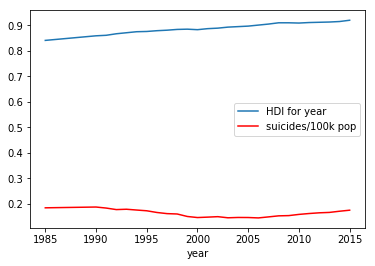

In [39]:
ax = plt.gca()
df_country1=df_HDI.loc[df_HDI['country']=='United States']
#modify column value to obtain suicide rate
df_country1['suicides/100k pop']=df_country1['suicides/100k pop']/100000*100
df_country1.plot(kind='line',x='year',y='HDI for year',ax=ax)
df_country1.plot(kind='line',x='year',y='suicides/100k pop', color='red', ax=ax)

plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


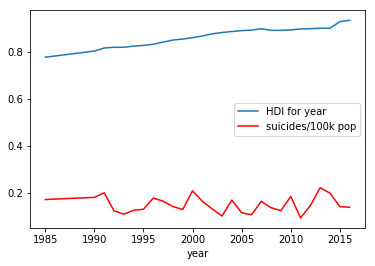

In [40]:
ax = plt.gca()
df_country1=df_HDI.loc[df_HDI['country']=='Iceland']
#modify column value to obtain suicide rate
df_country1['suicides/100k pop']=df_country1['suicides/100k pop']/100000*100
df_country1.plot(kind='line',x='year',y='HDI for year',ax=ax)
df_country1.plot(kind='line',x='year',y='suicides/100k pop', color='red', ax=ax)

plt.show()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


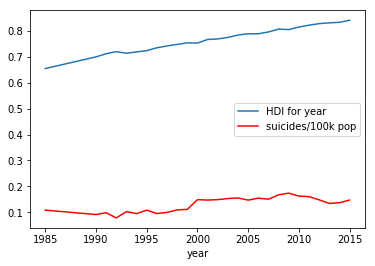

In [41]:
ax = plt.gca()
df_country2=df_HDI.loc[df_HDI['country']=='Chile']
#modify column value to obtain suicide rate
df_country2['suicides/100k pop']=df_country2['suicides/100k pop']/100000*100
df_country2.plot(kind='line',x='year',y='HDI for year',ax=ax)
df_country2.plot(kind='line',x='year',y='suicides/100k pop', color='red', ax=ax)

plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


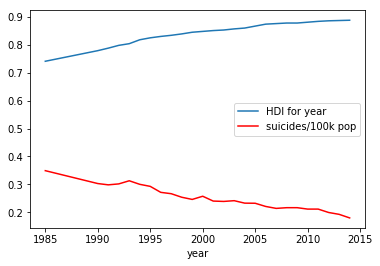

In [42]:
ax = plt.gca()
df_country2=df_HDI.loc[df_HDI['country']=='France']
#modify column value to obtain suicide rate
df_country2['suicides/100k pop']=df_country2['suicides/100k pop']/100000*100
df_country2.plot(kind='line',x='year',y='HDI for year',ax=ax)
df_country2.plot(kind='line',x='year',y='suicides/100k pop', color='red', ax=ax)

plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


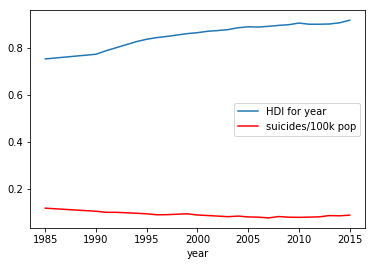

In [43]:
ax = plt.gca()
df_country2=df_HDI.loc[df_HDI['country']=='United Kingdom']
#modify column value to obtain suicide rate
df_country2['suicides/100k pop']=df_country2['suicides/100k pop']/100000*100
df_country2.plot(kind='line',x='year',y='HDI for year',ax=ax)
df_country2.plot(kind='line',x='year',y='suicides/100k pop', color='red', ax=ax)

plt.show()

Interestringly, we can observe a clear negative relationship between suicide rate and HDI in France, indicating that as the human development improves in France over time, the suicide rate greatly decreased. In other countries, like the United States and the United Kingdom, no clear relationship is found between two factors. We can also notice that in Chile, during the time period between 1995 and 2010, suicide rate even increases as HDI increases.

### Scatter plot

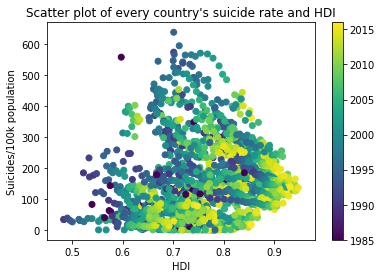

In [44]:
# scatter plot to see suicide rate and GDP per capita for countries in different year
plt.scatter(df_HDI['HDI for year'],df_HDI['suicides/100k pop'],c=df_HDI['year'])
plt.title("Scatter plot of every country's suicide rate and HDI")
plt.xlabel("HDI")
plt.ylabel("Suicides/100k population")
plt.colorbar()
plt.show()

As we can see in the graph, most countries' HDI shows an increasing trend over time. However, as the index getting bigger, there is not a clear trend about how suicide rate reacts to HDI value. We can clearly see a peak in suicide rate where country HDI is roughly 0.7, but when HDI is extremely low or extremely high(at two ends of the graph), suicide rates are not very high.  

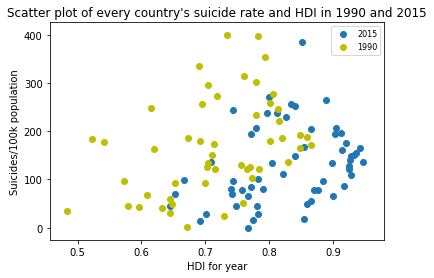

In [45]:
# scatter plot to see suicide rate and HDI for different countries in year 1990 and 2015
year_2015 = plt.scatter(df_HDI[df_HDI['year']==2015]['HDI for year'],df_HDI[df_HDI['year']==2015]['suicides/100k pop'])
year_1990 = plt.scatter(df_HDI[df_HDI['year']==1990]['HDI for year'],df_HDI[df_HDI['year']==1990]['suicides/100k pop'], color='y')
plt.title("Scatter plot of every country's suicide rate and HDI in 1990 and 2015")
plt.xlabel("HDI for year")
plt.ylabel("Suicides/100k population")
plt.legend((year_2015, year_1990),('2015', '1990'),scatterpoints=1,loc='upper right',fontsize=8)
plt.show()

We can see a trend that HDI greatly increases in most countries over time, showing a positive relation between HDI and time. But suicide rate distributions in these two years do not have sigificant difference as HDI changes. 

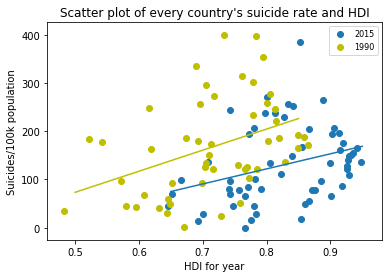

In [46]:
# best fit line in linear regression model
a1, b1 = np.polyfit(df_HDI[df_HDI['year']==2015]['HDI for year'], df_HDI[df_HDI['year']==2015]['suicides/100k pop'], 1)
hdi_2015 = np.linspace(0.65,0.95)
pred_suicide_rate_2015 = a1*hdi_2015 + b1

a2, b2 = np.polyfit(df_HDI[df_HDI['year']==1990]['HDI for year'], df_HDI[df_HDI['year']==1990]['suicides/100k pop'], 1)
hdi_1990 = np.linspace(0.5,0.85)
pred_suicide_rate_1990 = a2*hdi_1990 + b2

year_2015 = plt.scatter(df_HDI[df_HDI['year']==2015]['HDI for year'],df_HDI[df_HDI['year']==2015]['suicides/100k pop'])
year_1990 = plt.scatter(df_HDI[df_HDI['year']==1990]['HDI for year'],df_HDI[df_HDI['year']==1990]['suicides/100k pop'], color='y')
plt.plot(hdi_2015, pred_suicide_rate_2015, )
plt.plot(hdi_1990, pred_suicide_rate_1990, '-r',color = 'y')
plt.title("Scatter plot of every country's suicide rate and HDI")
plt.xlabel("HDI for year")
plt.ylabel("Suicides/100k population")
plt.legend((year_2015, year_1990),('2015', '1990'),scatterpoints=1,loc='upper right',fontsize=8)
plt.show()

In [47]:
#calculate correlation coefficient for these two years
df_HDI_2015 = df_HDI[df_HDI['year']==2015]
correlation_2015 = np.corrcoef(df_HDI_2015['HDI for year'],df_HDI_2015['suicides/100k pop'])

df_HDI_1990 = df_HDI[df_HDI['year']==1990]
correlation_1990 = np.corrcoef(df_HDI_1990['HDI for year'],df_HDI_1990['suicides/100k pop'])
print(correlation_1990)
print(correlation_2015)

[[ 1.          0.40024684]
 [ 0.40024684  1.        ]]
[[ 1.          0.31845824]
 [ 0.31845824  1.        ]]


The correlation coefficient between suicide rate and HDI is 0.40 in 1990. The correlation coefficient between suicide rate and HDI is 0.32 in 2015. They match the slopes of two prediction lines in the previous graph, thus indicating that suicide rate is more related to HDI in early years(1990).

In [48]:
#run linear regression model to conform the relationship between suicide rate and HDI in 2015
df_HDI_2015.rename(columns={'HDI for year':'HDI'}, inplace=True)
df_HDI_2015.rename(columns={'suicides/100k pop':'suicides'}, inplace=True)

#find p-value for linear regression in 2015 
outcome_1, predictors_1 = patsy.dmatrices('suicides~ HDI', df_HDI_2015)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:               suicides   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     6.320
Date:                Sat, 01 Jun 2019   Prob (F-statistic):             0.0148
Time:                        14:58:23   Log-Likelihood:                -332.85
No. Observations:                  58   AIC:                             669.7
Df Residuals:                      56   BIC:                             673.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -127.8239    103.321     -1.237      0.2

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


P value is 0.015, which is smaller than 0.05, which indicates strong evidence against null hypothesis. So we reject null hypothesis. There is strong relationship between suicide rate and HDI in year 2015.

In [49]:
#run linear regression model to conform the relationship between suicide rate and HDI in 1990
df_HDI_1990.rename(columns={'HDI for year':'HDI'}, inplace=True)
df_HDI_1990.rename(columns={'suicides/100k pop':'suicides'}, inplace=True)

#find p-value for linear regression in 2015 
outcome_2, predictors_2 = patsy.dmatrices('suicides~ HDI', df_HDI_1990)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()

print(res_2.summary())

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


                            OLS Regression Results                            
Dep. Variable:               suicides   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     9.347
Date:                Sat, 01 Jun 2019   Prob (F-statistic):            0.00361
Time:                        14:58:24   Log-Likelihood:                -302.33
No. Observations:                  51   AIC:                             608.7
Df Residuals:                      49   BIC:                             612.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -144.8278    103.070     -1.405      0.1

P value is 0.004, which is smaller than 0.05, which indicates strong evidence against null hypothesis. So we reject null hypothesis. There is also strong relationship between suicide rate and HDI in year 1990.

In [50]:
# list of developed countries based on UN
#https://www.un.org/en/development/desa/policy/wesp/wesp_current/2014wesp_country_classification.pdf
#https://www.un.org/en/development/desa/policy/wesp/wesp_current/2012country_class.pdf
developed_countries=['Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Portugal' ,'Spain', 'Sweden', 'United Kingdom', 'Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Portugal', 'Spain', 'Sweden',
'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Estonia', 'Hungary', 'Latvia', 'Lithuania', 'Malta', 'Poland', 'Romania', 'Slovakia', 'Slovenia', 'Iceland','Norway', 'Switzerland' , 'Australia', 'Canada', 'Japan', 'New Zealand', 'United States', 'Canada', 'Japan' ]
# add a new coloumn as country classification
main_df['country classification'] = "developing"
# iterate through the list of developed country
# if finds the country in the list replace the country classification as a developed
for i, row in main_df.iterrows():
    if(row['country'] in developed_countries):
        main_df.loc[i, 'country classification'] = "developed"


In [51]:
main_df.groupby(['country classification'])['suicides/100k pop'].mean()

country classification
developed     16.248539
developing    10.278889
Name: suicides/100k pop, dtype: float64

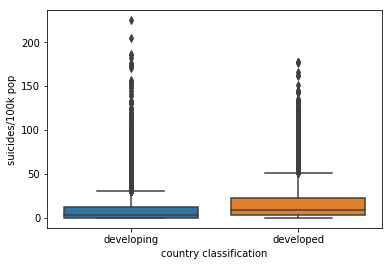

In [52]:
sns.boxplot(x='country classification', y= 'suicides/100k pop',data=main_df)

(array([  8.00000000e+03,   2.45100000e+03,   7.43000000e+02,
          2.69000000e+02,   1.84000000e+02,   9.00000000e+01,
          5.50000000e+01,   1.90000000e+01,   6.00000000e+00,
          7.00000000e+00]),
 array([   0.   ,   17.761,   35.522,   53.283,   71.044,   88.805,
         106.566,  124.327,  142.088,  159.849,  177.61 ]),
 <a list of 10 Patch objects>)

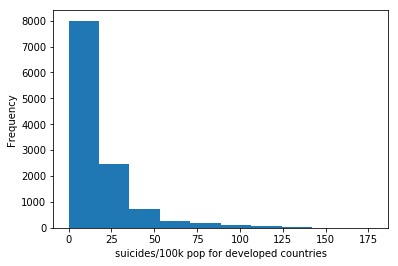

In [53]:




plt.xlabel("suicides/100k pop for developed countries")
plt.ylabel("Frequency")
plt.hist(main_df[main_df['country classification']=='developed']['suicides/100k pop'])


(array([  1.39860000e+04,   1.20200000e+03,   4.03000000e+02,
          2.76000000e+02,   8.70000000e+01,   2.30000000e+01,
          8.00000000e+00,   6.00000000e+00,   3.00000000e+00,
          2.00000000e+00]),
 array([   0.   ,   22.497,   44.994,   67.491,   89.988,  112.485,
         134.982,  157.479,  179.976,  202.473,  224.97 ]),
 <a list of 10 Patch objects>)

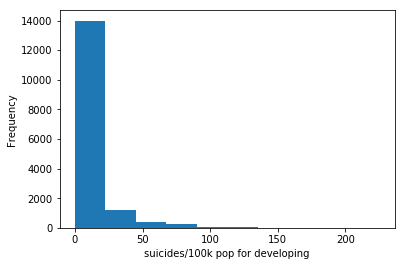

In [54]:
plt.xlabel("suicides/100k pop for developing")
plt.ylabel("Frequency")
plt.hist(main_df[main_df['country classification']=='developing']['suicides/100k pop'])




In [55]:
# transfer the data to log based since the data skewed to the right
main_df['log suicides/100k pop']=main_df['suicides/100k pop']
main_df['log suicides/100k pop']=main_df['log suicides/100k pop'].replace(0,1)
main_df['log suicides/100k pop']=np.log10(main_df['log suicides/100k pop'])


(array([   38.,   157.,   439.,   540.,  1430.,  1589.,  2790.,  3100.,
         1411.,   330.]),
 array([-1.52287875, -1.14564413, -0.76840951, -0.3911749 , -0.01394028,
         0.36329433,  0.74052895,  1.11776357,  1.49499818,  1.8722328 ,
         2.24946741]),
 <a list of 10 Patch objects>)

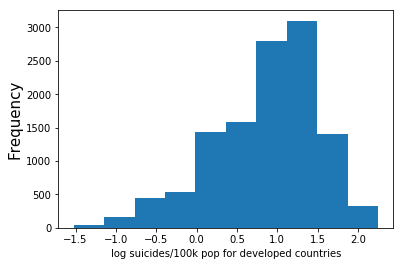

In [56]:
plt.xlabel("log suicides/100k pop for developed countries")
plt.ylabel("Frequency",fontsize=15)
plt.hist(main_df[main_df['country classification']=='developed']['log suicides/100k pop'])


(array([   13.,    41.,   383.,   961.,  5281.,  2532.,  3204.,  2435.,
         1007.,   139.]),
 array([-1.69897   , -1.29386054, -0.88875108, -0.48364162, -0.07853216,
         0.3265773 ,  0.73168676,  1.13679622,  1.54190569,  1.94701515,
         2.35212461]),
 <a list of 10 Patch objects>)

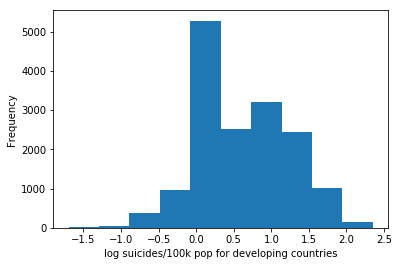

In [57]:
plt.xlabel("log suicides/100k pop for developing countries")
plt.ylabel("Frequency")
plt.hist(main_df[main_df['country classification']=='developing']['log suicides/100k pop'])



In [58]:
#run the ttest
s_developed = main_df.loc[main_df['country classification'] == 'developed' , ['log suicides/100k pop']]
s_developing = main_df.loc[main_df['country classification'] == 'developing' , ['log suicides/100k pop']]
avg_s_developed = s_developed ['log suicides/100k pop'].mean()
avg_s_developing = s_developing ['log suicides/100k pop'].mean()

t_val, p_val = ttest_ind(s_developed, s_developing, equal_var = False)
if p_val < 0.01:
	print('There is a significant difference!')
else:
	print('There is NOT a significant difference!')


There is a significant difference!


In [59]:
# dictionry of countries and its continents based on https://gist.github.com/pamelafox/986163
countries = [{'timezones': ['America/Antigua'], 'code': 'AG', 'continent': 'North America', 'name': 'Antigua and Barbuda', 'capital': "St. John's"},{'timezones': ['Asia/Yerevan'], 'code': 'AM', 'continent': 'Asia', 'name': 'Armenia', 'capital': 'Yerevan'},{'timezones': ['America/Argentina/Buenos_Aires', 'America/Argentina/Cordoba', 'America/Argentina/Jujuy', 'America/Argentina/Tucuman', 'America/Argentina/Catamarca', 'America/Argentina/La_Rioja', 'America/Argentina/San_Juan', 'America/Argentina/Mendoza', 'America/Argentina/Rio_Gallegos', 'America/Argentina/Ushuaia'], 'code': 'AR', 'continent': 'South America', 'name': 'Argentina', 'capital': 'Buenos Aires'},{'timezones': ['Europe/Vienna'], 'code': 'AT', 'continent': 'Europe', 'name': 'Austria', 'capital': 'Vienna'},{'timezones': ['Australia/Lord_Howe', 'Australia/Hobart', 'Australia/Currie', 'Australia/Melbourne', 'Australia/Sydney', 'Australia/Broken_Hill', 'Australia/Brisbane', 'Australia/Lindeman', 'Australia/Adelaide', 'Australia/Darwin', 'Australia/Perth'], 'code': 'AU', 'continent': 'Oceania', 'name': 'Australia', 'capital': 'Canberra'}, {'timezones': ['America/Barbados'], 'code': 'BB', 'continent': 'North America', 'name': 'Barbados', 'capital': 'Bridgetown'},{'timezones': ['Europe/Brussels'], 'code': 'BE', 'continent': 'Europe', 'name': 'Belgium', 'capital': 'Brussels'},{'timezones': ['Europe/Sofia'], 'code': 'BG', 'continent': 'Europe', 'name': 'Bulgaria', 'capital': 'Sofia'},{'timezones': ['Asia/Bahrain'], 'code': 'BH', 'continent': 'Asia', 'name': 'Bahrain', 'capital': 'Manama'},{'timezones': ['America/Noronha', 'America/Belem', 'America/Fortaleza', 'America/Recife', 'America/Araguaina', 'America/Maceio', 'America/Bahia', 'America/Sao_Paulo', 'America/Campo_Grande', 'America/Cuiaba', 'America/Porto_Velho', 'America/Boa_Vista', 'America/Manaus', 'America/Eirunepe', 'America/Rio_Branco'], 'code': 'BR', 'continent': 'South America', 'name': 'Brazil', 'capital': 'Bras\xc3\xadlia'},{'timezones': ['America/Nassau'], 'code': 'BS', 'continent': 'North America', 'name': 'Bahamas', 'capital': 'Nassau'},{'timezones': ['Europe/Minsk'], 'code': 'BY', 'continent': 'Europe', 'name': 'Belarus', 'capital': 'Minsk'},{'timezones': ['America/Belize'], 'code': 'BZ', 'continent': 'North America', 'name': 'Belize', 'capital': 'Belmopan'},{'timezones': ['America/St_Johns', 'America/Halifax', 'America/Glace_Bay', 'America/Moncton', 'America/Goose_Bay', 'America/Blanc-Sablon', 'America/Montreal', 'America/Toronto', 'America/Nipigon', 'America/Thunder_Bay', 'America/Pangnirtung', 'America/Iqaluit', 'America/Atikokan', 'America/Rankin_Inlet', 'America/Winnipeg', 'America/Rainy_River', 'America/Cambridge_Bay', 'America/Regina', 'America/Swift_Current', 'America/Edmonton', 'America/Yellowknife', 'America/Inuvik', 'America/Dawson_Creek', 'America/Vancouver', 'America/Whitehorse', 'America/Dawson'], 'code': 'CA', 'continent': 'North America', 'name': 'Canada', 'capital': 'Ottawa'},{'timezones': ['America/Santiago', 'Pacific/Easter'], 'code': 'CL', 'continent': 'South America', 'name': 'Chile', 'capital': 'Santiago'},{'timezones': ['America/Bogota'], 'code': 'CO', 'continent': 'South America', 'name': 'Colombia', 'capital': 'Bogot\xc3\xa1'},{'timezones': ['America/Costa_Rica'], 'code': 'CR', 'continent': 'North America', 'name': 'Costa Rica', 'capital': 'San Jos\xc3\xa9'},{'timezones': ['America/Havana'], 'code': 'CU', 'continent': 'North America', 'name': 'Cuba', 'capital': 'Havana'},{'timezones': ['Asia/Nicosia'], 'code': 'CY', 'continent': 'Asia', 'name': 'Cyprus', 'capital': 'Nicosia'},{'timezones': ['Europe/Prague'], 'code': 'CZ', 'continent': 'Europe', 'name': 'Czech Republic', 'capital': 'Prague'},{'timezones': ['Europe/Berlin'], 'code': 'DE', 'continent': 'Europe', 'name': 'Germany', 'capital': 'Berlin'},{'timezones': ['Europe/Copenhagen'], 'code': 'DK', 'continent': 'Europe', 'name': 'Denmark', 'capital': 'Copenhagen'},{'timezones': ['America/Dominica'], 'code': 'DM', 'continent': 'North America', 'name': 'Dominica', 'capital': 'Roseau'},{'timezones': ['America/Guayaquil', 'Pacific/Galapagos'], 'code': 'EC', 'continent': 'South America', 'name': 'Ecuador', 'capital': 'Quito'},{'timezones': ['Europe/Tallinn'], 'code': 'EE', 'continent': 'Europe', 'name': 'Estonia', 'capital': 'Tallinn'},{'timezones': ['Europe/Helsinki'], 'code': 'FI', 'continent': 'Europe', 'name': 'Finland', 'capital': 'Helsinki'},{'timezones': ['Pacific/Fiji'], 'code': 'FJ', 'continent': 'Oceania', 'name': 'Fiji', 'capital': 'Suva'},{'timezones': ['Europe/Paris'], 'code': 'FR', 'continent': 'Europe', 'name': 'France', 'capital': 'Paris'},{'timezones': ['Asia/Tbilisi'], 'code': 'GE', 'continent': 'Asia', 'name': 'Georgia', 'capital': 'Tbilisi'},{'timezones': ['Europe/Athens'], 'code': 'GR', 'continent': 'Europe', 'name': 'Greece', 'capital': 'Athens'},{'timezones': ['America/Guatemala'], 'code': 'GT', 'continent': 'North America', 'name': 'Guatemala', 'capital': 'Guatemala City'},{'timezones': ['America/Guyana'], 'code': 'GY', 'continent': 'South America', 'name': 'Guyana', 'capital': 'Georgetown'},{'timezones': ['Europe/Budapest'], 'code': 'HU', 'continent': 'Europe', 'name': 'Hungary', 'capital': 'Budapest'},{'timezones': ['Europe/Dublin'], 'code': 'IE', 'continent': 'Europe', 'name': 'Ireland', 'capital': 'Dublin'},{'timezones': ['Asia/Jerusalem'], 'code': 'IL', 'continent': 'Asia', 'name': 'Israel', 'capital': 'Jerusalem'},{'timezones': ['Atlantic/Reykjavik'], 'code': 'IS', 'continent': 'Europe', 'name': 'Iceland', 'capital': 'Reykjav\xc3\xadk'},{'timezones': ['Europe/Rome'], 'code': 'IT', 'continent': 'Europe', 'name': 'Italy', 'capital': 'Rome'},{'timezones': ['America/Jamaica'], 'code': 'JM', 'continent': 'North America', 'name': 'Jamaica', 'capital': 'Kingston'},{'timezones': ['Asia/Tokyo'], 'code': 'JP', 'continent': 'Asia', 'name': 'Japan', 'capital': 'Tokyo'},{'timezones': ['Asia/Bishkek'], 'code': 'KG', 'continent': 'Asia', 'name': 'Kyrgyzstan', 'capital': 'Bishkek'},{'timezones': ['Pacific/Tarawa', 'Pacific/Enderbury', 'Pacific/Kiritimati'], 'code': 'KI', 'continent': 'Oceania', 'name': 'Kiribati', 'capital': 'Tarawa'},{'timezones': ['Asia/Kuwait'], 'code': 'KW', 'continent': 'Asia', 'name': 'Kuwait', 'capital': 'Kuwait City'},{'timezones': ['Europe/Vilnius'], 'code': 'LT', 'continent': 'Europe', 'name': 'Lithuania', 'capital': 'Vilnius'},{'timezones': ['Europe/Luxembourg'], 'code': 'LU', 'continent': 'Europe', 'name': 'Luxembourg', 'capital': 'Luxembourg City'},{'timezones': ['Europe/Riga'], 'code': 'LV', 'continent': 'Europe', 'name': 'Latvia', 'capital': 'Riga'},{'timezones': ['Asia/Ulaanbaatar', 'Asia/Hovd', 'Asia/Choibalsan'], 'code': 'MN', 'continent': 'Asia', 'name': 'Mongolia', 'capital': 'Ulaanbaatar'},{'timezones': ['Europe/Malta'], 'code': 'MT', 'continent': 'Europe', 'name': 'Malta', 'capital': 'Valletta'},{'timezones': ['Indian/Mauritius'], 'code': 'MU', 'continent': 'Africa', 'name': 'Mauritius', 'capital': 'Port Louis'},{'timezones': ['Indian/Maldives'], 'code': 'MV', 'continent': 'Asia', 'name': 'Maldives', 'capital': 'Mal\xc3\xa9'},{'timezones': ['America/Mexico_City', 'America/Cancun', 'America/Merida', 'America/Monterrey', 'America/Mazatlan', 'America/Chihuahua', 'America/Hermosillo', 'America/Tijuana'], 'code': 'MX', 'continent': 'North America', 'name': 'Mexico', 'capital': 'Mexico City'},{'timezones': ['America/Managua'], 'code': 'NI', 'continent': 'North America', 'name': 'Nicaragua', 'capital': 'Managua'},{'timezones': ['Europe/Amsterdam'], 'code': 'NL', 'continent': 'Europe', 'name': 'Netherlands', 'capital': 'Amsterdam'},{'timezones': ['Europe/Oslo'], 'code': 'NO', 'continent': 'Europe', 'name': 'Norway', 'capital': 'Oslo'},{'timezones': ['Pacific/Auckland', 'Pacific/Chatham'], 'code': 'NZ', 'continent': 'Oceania', 'name': 'New Zealand', 'capital': 'Wellington'},{'timezones': ['Asia/Muscat'], 'code': 'OM', 'continent': 'Asia', 'name': 'Oman', 'capital': 'Muscat'},{'timezones': ['America/Panama'], 'code': 'PA', 'continent': 'North America', 'name': 'Panama', 'capital': 'Panama City'},{'timezones': ['Asia/Manila'], 'code': 'PH', 'continent': 'Asia', 'name': 'Philippines', 'capital': 'Manila'},{'timezones': ['Europe/Warsaw'], 'code': 'PL', 'continent': 'Europe', 'name': 'Poland', 'capital': 'Warsaw'},{'timezones': ['Europe/Lisbon', 'Atlantic/Madeira', 'Atlantic/Azores'], 'code': 'PT', 'continent': 'Europe', 'name': 'Portugal', 'capital': 'Lisbon'},{'timezones': ['America/Asuncion'], 'code': 'PY', 'continent': 'South America', 'name': 'Paraguay', 'capital': 'Asunci\xc3\xb3n'},{'timezones': ['Asia/Qatar'], 'code': 'QA', 'continent': 'Asia', 'name': 'Qatar', 'capital': 'Doha'},{'timezones': ['Europe/Bucharest'], 'code': 'RO', 'continent': 'Europe', 'name': 'Romania', 'capital': 'Bucharest'},{'timezones': ['Europe/Kaliningrad', 'Europe/Moscow', 'Europe/Volgograd', 'Europe/Samara', 'Asia/Yekaterinburg', 'Asia/Omsk', 'Asia/Novosibirsk', 'Asia/Krasnoyarsk', 'Asia/Irkutsk', 'Asia/Yakutsk', 'Asia/Vladivostok', 'Asia/Sakhalin', 'Asia/Magadan', 'Asia/Kamchatka', 'Asia/Anadyr'], 'code': 'RU', 'continent': 'Europe', 'name': 'Russian Federation', 'capital': 'Moscow'},{'timezones': ['Indian/Mahe'], 'code': 'SC', 'continent': 'Africa', 'name': 'Seychelles', 'capital': 'Victoria'},{'timezones': ['Europe/Stockholm'], 'code': 'SE', 'continent': 'Europe', 'name': 'Sweden', 'capital': 'Stockholm'},{'timezones': ['Asia/Singapore'], 'code': 'SG', 'continent': 'Asia', 'name': 'Singapore', 'capital': 'Singapore'},{'timezones': ['Europe/Ljubljana'], 'code': 'SI', 'continent': 'Europe', 'name': 'Slovenia', 'capital': 'Ljubljana'},{'timezones': ['Europe/Bratislava'], 'code': 'SK', 'continent': 'Europe', 'name': 'Slovakia', 'capital': 'Bratislava'},{'timezones': ['Europe/San_Marino'], 'code': 'SM', 'continent': 'Europe', 'name': 'San Marino', 'capital': 'San Marino'},{'timezones': ['America/Paramaribo'], 'code': 'SR', 'continent': 'South America', 'name': 'Suriname', 'capital': 'Paramaribo'},{'timezones': ['Asia/Bangkok'], 'code': 'TH', 'continent': 'Asia', 'name': 'Thailand', 'capital': 'Bangkok'},{'timezones': ['Asia/Ashgabat'], 'code': 'TM', 'continent': 'Asia', 'name': 'Turkmenistan', 'capital': 'Ashgabat'},{'timezones': ['Europe/Istanbul'], 'code': 'TR', 'continent': 'Asia', 'name': 'Turkey', 'capital': 'Ankara'},{'timezones': ['America/Port_of_Spain'], 'code': 'TT', 'continent': 'North America', 'name': 'Trinidad and Tobago', 'capital': 'Port of Spain'},{'timezones': ['Europe/Kiev', 'Europe/Uzhgorod', 'Europe/Zaporozhye', 'Europe/Simferopol'], 'code': 'UA', 'continent': 'Europe', 'name': 'Ukraine', 'capital': 'Kiev'},{'timezones': ['America/New_York', 'America/Detroit', 'America/Kentucky/Louisville', 'America/Kentucky/Monticello', 'America/Indiana/Indianapolis', 'America/Indiana/Marengo', 'America/Indiana/Knox', 'America/Indiana/Vevay', 'America/Chicago', 'America/Indiana/Vincennes', 'America/Indiana/Petersburg', 'America/Menominee', 'America/North_Dakota/Center', 'America/North_Dakota/New_Salem', 'America/Denver', 'America/Boise', 'America/Shiprock', 'America/Phoenix', 'America/Los_Angeles', 'America/Anchorage', 'America/Juneau', 'America/Yakutat', 'America/Nome', 'America/Adak', 'Pacific/Honolulu'], 'code': 'US', 'continent': 'North America', 'name': 'United States', 'capital': 'Washington, D.C.'},{'timezones': ['America/Montevideo'], 'code': 'UY', 'continent': 'South America', 'name': 'Uruguay', 'capital': 'Montevideo'},{'timezones': ['Asia/Samarkand', 'Asia/Tashkent'], 'code': 'UZ', 'continent': 'Asia', 'name': 'Uzbekistan', 'capital': 'Tashkent'},{'timezones': ['Europe/Sarajevo'], 'code': 'BA', 'continent': 'Europe', 'name': 'Bosnia and Herzegovina', 'capital': 'Sarajevo'},{'timezones': ['Europe/Zagreb'], 'code': 'HR', 'continent': 'Europe', 'name': 'Croatia', 'capital': 'Zagreb'},{'timezones': ['America/El_Salvador'], 'code': 'SV', 'continent': 'North America', 'name': 'El Salvador', 'capital': 'San Salvador'},{'timezones': ['America/Grenada'], 'code': 'GD', 'continent': 'North America', 'name': 'Grenada', 'capital': "St. George's"},{'timezones': ['Asia/Almaty', 'Asia/Qyzylorda', 'Asia/Aqtobe', 'Asia/Aqtau', 'Asia/Oral'], 'code': 'KZ', 'continent': 'Asia', 'name': 'Kazakhstan', 'capital': 'Astana'},{'timezones': ['Europe/Podgorica'], 'code': 'ME', 'continent': 'Europe', 'name': 'Montenegro', 'capital': 'Podgorica'},{'timezones': ['America/St_Kitts'], 'code': 'KN', 'continent': 'North America', 'name': 'Saint Kitts and Nevis', 'capital': 'Basseterre'},{'timezones': ['America/St_Lucia'], 'code': 'LC', 'continent': 'North America', 'name': 'Saint Lucia', 'capital': 'Castries'},{'timezones': ['America/St_Vincent'], 'code': 'VC', 'continent': 'North America', 'name': 'Saint Vincent and Grenadines', 'capital': 'Kingstown'},{'timezones': ['Europe/Belgrade'], 'code': 'RS', 'continent': 'Europe', 'name': 'Serbia', 'capital': 'Belgrade'},{'timezones': ['Africa/Johannesburg'], 'code': 'ZA', 'continent': 'Africa', 'name': 'South Africa', 'capital': 'Pretoria'},{'timezones': ['Asia/Colombo'], 'code': 'LK', 'continent': 'Asia', 'name': 'Sri Lanka', 'capital': 'Sri Jayewardenepura Kotte'},{'timezones': ['Europe/Zurich'], 'code': 'CH', 'continent': 'Europe', 'name': 'Switzerland', 'capital': 'Bern'},{'timezones': ['Asia/Dubai'], 'code': 'AE', 'continent': 'Asia', 'name': 'United Arab Emirates', 'capital': 'Abu Dhabi'},{'timezones': ['Europe/London'], 'code': 'GB', 'continent': 'Europe', 'name': 'United Kingdom', 'capital': 'London'}, {'timezones': ['?'], 'code': '?', 'continent': 'Asia', 'name': 'Macau', 'capital': '?'}, {'timezones': ['?'], 'code': '?', 'continent': 'North America', 'name': 'Puerto Rico', 'capital': '?'}, {'timezones': ['?'], 'code': '?', 'continent': 'Asia', 'name': 'Republic of Korea', 'capital': '?'}, {'timezones': ['Europe/Madrid', 'Africa/Ceuta', 'Atlantic/Canary'], 'code': 'ES', 'continent': 'Europe', 'name': 'Spain', 'capital': 'Madrid'}]


In [60]:
# Make new variable 'continent' that represent continent of each country
# we only considered the year 2015
main_df=main_df[main_df['year']==2015]
main_df['continent'] = "NA"
# iterate through the dataframe and dictionary
for i, row in main_df.iterrows():
        for j in countries:
            if (row['country']==j["name"]):
                main_df.loc[i, 'continent'] = j["continent"]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [61]:
#we analyzed the suicide rate based on the continent. unfortunatly due to lack of data from Africa and Asia we cannot include these two continents in our report.

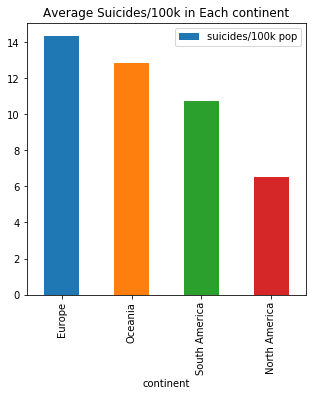

In [62]:
main_df=main_df[main_df['continent']!='Africa']
main_df=main_df[main_df['continent']!='Asia']
continent_group = main_df.groupby(['continent']).mean()
continent_group = continent_group.sort_values(by=['suicides/100k pop'], ascending=False)
continent_group.plot(y='suicides/100k pop',kind="bar", figsize=(5, 5), title="Average Suicides/100k in Each continent")


In [63]:
#As we can see Europe has the highest suicide rate. and Slovenia, Hungary, and Lithuania has the highest suicide rate.

# Ethics & Privacy

- Based on the Kaggle policy we complied that we use the Services for our own internal, personal, non-commercial use, and not on behalf of or for the benefit of any third party therefore we have the permission to use the data. Since what we are doing is a non-profit school project that is not for the benefit of any third party, we believe that we have permission to use the data. (https://www.kaggle.com/terms)
- We believe that we do not need to deal with the privacy concerns since the data is masked. Similar to data that is protected by the Safe Harbour method, we cannot see any identifiers of the individuals that are in this dataset.
- There is potential bias in our dataset, that is, the dataset is not complete. It is missing some countries (including China and India, which are the two countries with most population in the world) therefore a large number of population is excluded in this dataset.
- Another issue is that we do not know how the data was collected, therefore we are not sure if the data is completely accurate. It is possible that in some countries the suiciders were not found or some people’s cause of death was misidentified.
- Unfortunately we cannot tell if the data is collected exactly accurate or not. However, since the dataset is analyzing the relationship among age, gender and country GDP, we can analyze the data even though the data does not include every country in the world since we are doing the hypothesis test of relationship .


# Conclusion & Discussion

*Fill in your discussion information here*